$$
\text{AE 370 Group project}: \textbf{Analysis of a Double Pendulum}
$$
$$
\textit{University of Illinois at Urbana-Champaign}
$$
$$
\text{Departement of Aerospace Engineering}
$$
$$
\textbf{Eric Chiang, Jonah Wu, Josue R. Bashombe}
$$


# Abstract

This project investigates the dynamics of a double pendulum system, a classic example of nonlinear and chaotic behavior in physics and engineering. The analysis combines theoretical modeling with numerical simulations to study the motion and energy conservation of the system. By applying Runge-Kutta 4th order (RK4) and Symplectic Euler methods, we explore how different numerical integrators capture the system’s sensitivity to initial conditions. Through phase space plots, time evolution graphs, and energy conservation analysis, the study highlights the trade-offs between accuracy and stability in numerical integration. This work provides insight into the complex behavior of nonlinear systems and serves as a foundation for future applications in control systems, and robotics.

# Introduction

The double pendulum is a deceptively simple mechanical system that consists of two pendulums attached end to end. Despite its straightforward structure, the system exhibits highly nonlinear and chaotic behavior, making it a compelling subject of study in the field of dynamics and control. Unlike a simple pendulum, whose motion is predictable and periodic, the double pendulum demonstrates extreme sensitivity to initial conditions, a hallmark of chaotic systems.

This project aims to analyze the motion of the double pendulum through both analytical insight and numerical simulation. By implementing and comparing different time integration methods, including Runge-Kutta 4th order (RK4) and Symplectic Euler. We investigate how well each method captures the evolution of the system and preserves physical quantities such as total energy. Additionally, the study explores how these methods behave under various time steps, emphasizing their suitability for modeling nonlinear systems over short and long time horizons.

Understanding such a system is not only intellectually enriching but also practically valuable, as the double pendulum serves as a simplified model for complex systems in robotics, biomechanics, aerospace manipulators, and vibration control. Through this investigation, we aim to develop both a deeper theoretical appreciation and practical insights into modeling chaotic systems using numerical methods.

### **The Double Pendulum: A Nonlinear and Chaotic Dynamical System**
<p align="center"><em>

</em></p>


<p align="center">
  <img src="double_pendulum.png" alt="Double Pendulum Diagram" width="500"/>
</p>

<p align="center"><em>Figure 1: Double Pendulum.</em></p>


#### **(i) Why is the double pendulum interesting and important to understand?**  
The **double pendulum** is a fundamental **nonlinear dynamical system** that exhibits **chaotic behavior** and extreme **sensitivity to initial conditions**. Understanding its motion is crucial in several engineering fields, including:  

- **Robotics & Control Systems** (e.g., bipedal locomotion, robotic arms)  
- **Biomechanics** (e.g., human gait analysis, prosthetic limb dynamics)  
- **Structural Engineering** (e.g., suspension bridges, tuned mass dampers)  
- **Aerospace Engineering** (e.g., spacecraft manipulators, attitude control)  

Unlike simple pendulums, which follow predictable periodic motion, the **double pendulum can behave unpredictably**, making it an excellent system for studying **nonlinear dynamics, chaos theory, and numerical stability in simulations**.

---

### **(ii) Key Questions to Explore**
Some key questions that we can investigate using numerical methods include:  

### **1. Chaos and Sensitivity to Initial Conditions**  
- How do small changes in initial angles or velocities affect the long-term motion of the double pendulum?  
- Can we quantify the system’s **Lyapunov exponent** (a measure of chaos)?  

### **2. Energy and Stability Analysis**  
- Under what conditions does the motion remain periodic vs. chaotic?  
- How does **energy conservation** behave numerically in different integration schemes (e.g., Euler vs. Runge-Kutta vs. symplectic methods)?  

### **3. Damping Effects and Practical Applications**  
- How does adding damping influence the system’s behavior?  
- Can we use damping or external control forces to stabilize the system?  

### **4. Bifurcation and Transition Between Motion States**  
- For given system parameters, is there a threshold where the motion transitions from stable oscillations to chaotic behavior?  
- How do different mass ratios and lengths affect stability?  

---

### **(iii) Mathematical Formulation of the Double Pendulum**  

The **double pendulum** consists of two rigid rods of lengths $ l_1, l_2 $, masses $ m_1, m_2 $, and two generalized coordinates $ \theta_1, \theta_2 $ representing the angles of the rods from the vertical. Using **Lagrangian mechanics**, the equations of motion are:

The equations of motion for the double pendulum are:

$$
(m_1 + m_2) l_1 \ddot{\theta}_1 + m_2 l_2 \ddot{\theta}_2 \cos(\theta_1 - \theta_2) + m_2 l_2 \dot{\theta}_2^2 \sin(\theta_1 - \theta_2) + (m_1 + m_2) g \sin \theta_1 = 0 \tag{19}
$$

$$
l_2 \ddot{\theta}_2 + l_1 \ddot{\theta}_1 \cos(\theta_1 - \theta_2) - l_1 \dot{\theta}_1^2 \sin(\theta_1 - \theta_2) + g \sin \theta_2 = 0 \tag{20}
$$

Alternatively, the system can be rewritten in first-order form for numerical integration:

$$
\begin{cases}
\dot{\theta}_1 = \omega_1 \\
\dot{\theta}_2 = \omega_2 \\
\dot{\omega}_1 = f_1(\theta_1, \theta_2, \omega_1, \omega_2) \\
\dot{\omega}_2 = f_2(\theta_1, \theta_2, \omega_1, \omega_2)
\end{cases}
$$

where $ f_1 $ and $ f_2 $ are nonlinear functions derived from the Lagrangian.

### **Relevant Parameters and Ranges**

| Parameter | Description | Typical Range | Unite| Application Context |
|-----------|-------------|---------------|------|---------------------|
| $$ m_1, m_2 $$ | Masses of the rods | $$ 0.1 - 10 $$ | kg | Small robotic arms, prosthetics, large mechanical linkages |
| $$ l_1, l_2 $$ | Lengths of the rods | $$ 0.1 - 2.0 $$ | m | Biomechanical limbs, robotic arms, suspension components |
| $$ g $$ | Acceleration due to gravity | $$ 9.81 $$ | m/s² | Standard Earth gravity |
| $$ \theta_1, \theta_2 $$ | Initial angles | $$ 0^\circ - 180^\circ $$ | degrees | Common range for controlled or free-swinging motion |
| $$ \omega_1, \omega_2 $$ | Initial angular velocities | $$ -10 - 10 $$ | rad/s | Speeds typically seen in human movement and robotic systems |

These parameter ranges are chosen to reflect values encountered in practical engineering applications:
- **Masses** between 0.1 kg and 10 kg cover systems from lightweight **robotic arms** to heavier **mechanical linkages**.
- **Lengths** between 0.1 m and 2 m correspond to **human limb dimensions**, **robotic manipulators**, and **pendular structures**.
- **Initial angles** up to 180° allow analysis of both **small oscillations** and **large-amplitude swings**, covering applications from controlled motions to chaotic behavior.
- **Angular velocities** of ±10 rad/s (≈ 100 RPM) reflect typical ranges found in **biomechanics** (e.g., limb movement) and **engineering designs** (e.g., robotic actuators).

---

## **Next Steps**
Now that we have our **dynamical system**, we can:  
1. Choose an appropriate **numerical method** (RK4, symplectic integrators, etc.).  
2. Implement and simulate the system in **Python or MATLAB**.  
3. Perform a **systematic study** of sensitivity, stability, and energy conservation.  



# Section 2
# **Numerical Method: Runge-Kutta 4th Order (RK4)**

In this section, we explore the **Runge-Kutta 4th Order (RK4)** method for studying the double pendulum system. We will justify why RK4 is well-suited for this system, provide a detailed mathematical derivation, and give an algorithmic summary.

---

## **(i) Justification for Using the RK4 Method**

### **Why RK4 is appropriate for the double pendulum:**

1. **Accuracy**:
   - The RK4 method is widely known for its high **accuracy** compared to simpler methods such as Euler's method or second-order Runge-Kutta methods. 
   - RK4 achieves **fourth-order accuracy**, meaning the error in each time step is proportional to $ O(h^5) $, where $ h $ is the time step. This leads to a global error of $ O(h^4) $, making RK4 significantly more accurate than lower-order methods like Euler's method, which only achieves **first-order accuracy** (error proportional to $ O(h^2) $).
   - In the context of the double pendulum, which exhibits **nonlinear dynamics** and is **chaotic**, accurate numerical integration is crucial to avoid large errors in long-term predictions. Even small numerical errors can quickly grow and lead to wildly incorrect simulations in chaotic systems.

2. **Stability**:
   - The RK4 method offers a good balance between **accuracy** and **stability**. For chaotic systems like the double pendulum, small errors tend to amplify over time, potentially destabilizing the system. RK4, due to its higher-order nature, is generally **more stable** than methods like Euler's method, which is known to cause **numerical instability** in chaotic systems.
   - The **Euler method**, while computationally inexpensive, can produce inaccurate and unstable results, especially when applied to systems like the double pendulum. Euler’s method has **poor stability** in chaotic systems because it doesn’t account for higher-order terms in the dynamics, causing errors to grow rapidly over time.
   - RK4, on the other hand, provides greater stability and ensures that errors are minimized, especially when solving stiff or highly nonlinear systems. For chaotic systems, RK4 is better suited to handle the **sensitive dependence on initial conditions**, a hallmark of chaotic behavior.

3. **np.cost**:
   - While RK4 requires more function evaluations per time step than simpler methods like Euler’s, its increased computational cost is justified by its **accuracy** and **stability**.
   - For simple systems, Euler’s method might be sufficient and computationally cheaper, but for complex systems like the double pendulum, the **increased accuracy** provided by RK4 often makes it the more cost-effective choice in the long run. For chaotic systems like the double pendulum, the RK4 method prevents the accumulation of errors over time, reducing the need for excessively small time steps that would be required in methods like Euler's.

### **Comparison to Other Methods**:

- **Euler's Method**:
  - **Pros**: Simple and computationally inexpensive.
  - **Cons**: Low accuracy, only first-order, prone to instability in chaotic systems.
  - **Use Case**: Suitable for quick, rough estimates in simple systems where high accuracy is not crucial.

- **Second-order Runge-Kutta (RK2)**:
  - **Pros**: More accurate than Euler's method (second-order accuracy).
  - **Cons**: Still not as accurate or stable as RK4 in chaotic systems.
  - **Use Case**: Could be used when a compromise between accuracy and computational cost is needed, but not ideal for systems with strong nonlinearities or chaotic behavior.

- **RK4**:
  - **Pros**: High accuracy (fourth-order), stable for chaotic systems, widely applicable to stiff and nonlinear systems.
  - **Cons**: More expensive computationally than Euler or RK2, but the increased accuracy often justifies the cost.
  - **Use Case**: Best choice for simulating chaotic systems like the double pendulum.

---

## **(ii) Mathematical Derivation of the RK4 Method**

### **Step-by-Step Derivation of RK4**
The RK4 method approximates the solution of a first-order system of ordinary differential equations (ODEs):

$$
\frac{d\mathbf{y}}{dt} = f(t, \mathbf{y})
$$

by estimating the value of $ \mathbf{y} $ at the next time step using a **weighted sum of function evaluations** at different points within the time step.

1. **Define the Initial Value Problem**  
   Given an initial condition:

   $$ \mathbf{y}(t_k) = \mathbf{y}_k $$

   we want to compute the solution at the next time step:

   $$ \mathbf{y}(t_{k+1}) = \mathbf{y}(t_k + h) $$

2. **Estimate the Slope at Four Points**  

   RK4 evaluates the function $ f(t, \mathbf{y}) $ at four different locations within the interval $ [t_k, t_{k+1}] $:
   
   - **$ k_1 $ (Euler's step):** The slope at the beginning of the interval.
     $$
     k_1 = h f(t_k, \mathbf{y}_k)
     $$

   - **$ k_2 $ (Midpoint estimate):** The slope at the midpoint, estimated using $ k_1 $.
     $$
     k_2 = h f\left(t_k + \frac{h}{2}, \mathbf{y}_k + \frac{k_1}{2} \right)
     $$

   - **$ k_3 $ (Improved midpoint estimate):** Another slope at the midpoint, but using $ k_2 $ for refinement.
     $$
     k_3 = h f\left(t_k + \frac{h}{2}, \mathbf{y}_k + \frac{k_2}{2} \right)
     $$

   - **$ k_4 $ (Final estimate at the end of the interval):** The slope at the end of the interval, using $ k_3 $.
     $$
     k_4 = h f(t_k + h, \mathbf{y}_k + k_3)
     $$

3. **Compute the Final Estimate**  

   The final update formula is obtained by taking a **weighted average** of these slopes:

   $$
   \mathbf{y}_{k+1} = \mathbf{y}_k + \frac{1}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right)
   $$

### **Graphical Interpretation of RK4**
RK4 works by:
- Taking a first estimate ($ k_1 $) using Euler's method.
- Refining the estimate with two midpoint evaluations ($ k_2, k_3 $).
- Confirming the prediction with a final evaluation at the end of the interval ($ k_4 $).
- Averaging these estimates in a way that reduces truncation error.

This method significantly **reduces error compared to Euler's method** while maintaining computational efficiency.

### **Error and Stability Properties**
#### **Truncation Error**
- **Local truncation error per step**: $ O(h^5) $
- **Global truncation error over multiple steps**: $ O(h^4) $

This means that reducing $ h $ by half reduces the error by a factor of **$ 2^4 = 16 $**, making RK4 **very accurate**.

#### **Stability Considerations**
- RK4 is **conditionally stable**, meaning $ h $ must be chosen carefully to prevent numerical divergence.
- If $ h $ is too **large**, RK4 can still produce errors in **highly chaotic systems**.
- **Adaptive step size methods** (such as RK45) can be used to **dynamically adjust** $ h $ to balance accuracy and performance.

#### **Choosing the Time Step $ h $**
- If $ h $ is **too large**, the method loses accuracy and may fail to resolve fast dynamics.
- If $ h $ is **too small**, the computational cost increases significantly.
- A reasonable **default** choice for chaotic systems is **$ h \approx 0.01 $ to $ 0.001 $** depending on system sensitivity.

---

## **(iii) Algorithmic Summary of RK4**

### **RK4 Integration Algorithm**:

1. **Input**: Initial conditions $ \mathbf{y}_0 $, time step $ h $, and function $ f(t, \mathbf{y}) $ (the right-hand side of the ODEs).
2. **For each time step $ k $**:
   1. Compute the four slopes:
      - $ k_1 = h \cdot f(t_k, \mathbf{y}_k) $
      - $ k_2 = h \cdot f(t_k + \frac{h}{2}, \mathbf{y}_k + \frac{k_1}{2}) $
      - $ k_3 = h \cdot f(t_k + \frac{h}{2}, \mathbf{y}_k + \frac{k_2}{2}) $
      - $ k_4 = h \cdot f(t_k + h, \mathbf{y}_k + k_3) $
   2. Update the solution:
      - $ \mathbf{y}_{k+1} = \mathbf{y}_k + \frac{1}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right) $
   3. Increment the time $ t_k \to t_{k+1} $.

3. **Output**: The updated state $ \mathbf{y}_{k+1} $ and the corresponding time $ t_{k+1} $.

### **Algorithm Pseudocode**:
```python
def RK4(f, y0, t0, tf, h):
    t = t0
    y = y0
    while t < tf:
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y_next = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        
        y = y_next
        t += h
    return y


# **Section 3: Demonstrating Correct Implementation of RK4**

---

# **(i) Error Convergence Study: Verifying RK4’s $ O(h^4) $ Accuracy**

### **Why Perform an Error Convergence Study?**
An **error convergence study** validates whether RK4 achieves the expected **$ O(h^4) $ global error scaling**.  
This is crucial because:  
- We want to **confirm the method’s accuracy** before using it for chaotic simulations.  
- The **double pendulum is highly sensitive to errors**, so numerical **precision is critical**.  

### **Error Scaling of RK4**
The **global error** of RK4 behaves as:

$$
E(h) \approx C h^4
$$

where $ C $ is a problem-dependent constant.  
- If RK4 is **working correctly**, then halving the time step $ h \to h/2 $ should reduce error by **$ 2^4 = 16 $**.  
- Plotting $ E(h) $ on a **log-log plot** should yield a **slope of 4**, confirming **$ O(h^4) $ accuracy**.

### **Methodology**
1. **Choose a test problem** with a known **exact solution**.
2. **Solve numerically** using RK4 for decreasing time steps **$ h $**.
3. **Compute errors** as:

   $$
   E(h) = \max \left| x_{\text{num}}(t) - x_{\text{exact}}(t) \right|
   $$

4. **Plot error vs. time step** in **log-log space**.  
   - If the slope is **$ \approx 4 $**, RK4 behaves as expected.  
   - If the slope deviates, RK4 is **not implemented correctly** or **time steps are too large**.  

### **Test Problem: Simple Harmonic Oscillator**
A good benchmark is the harmonic oscillator:

$$
\frac{d^2x}{dt^2} + \omega^2 x = 0
$$

which can be rewritten as a **first-order system**:

$$
\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\omega^2 x
\end{cases}
$$

with the exact solution:

$$
x(t) = x_0 \cos(\omega t), \quad v(t) = -x_0 \omega \sin(\omega t)
$$

where we set **$ \omega = 2\pi $**, **$ x_0 = 1 $**, and compare RK4 to the exact solution.

---


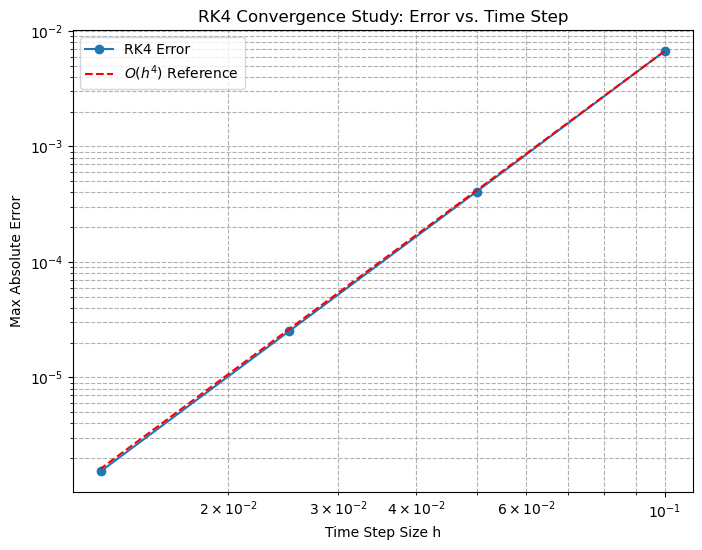

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the simple harmonic oscillator
omega = 2 * np.pi

def harmonic_oscillator(t, y):
    """ Defines the simple harmonic oscillator system. """
    x, v = y
    return np.array([v, -omega**2 * x])

# Exact solution for validation
def exact_solution(t, x0=1):
    """ Returns the exact solution x(t) for the harmonic oscillator. """
    return x0 * np.cos(omega * t)

# Implement RK4 solver
def RK4_solver(f, y0, t0, tf, h):
    """ Implements the Runge-Kutta 4th order method. """
    t_values = np.arange(t0, tf + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    
    for i in range(len(t_values) - 1):
        t, y = t_values[i], y_values[i]
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        y_values[i + 1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t_values, y_values

# Run RK4 for different step sizes and compute errors
time_steps = [0.1, 0.05, 0.025, 0.0125]  # Reduce by factor of 2
errors = []

for h in time_steps:
    t_values, x_values = RK4_solver(harmonic_oscillator, np.array([1, 0]), 0, 1, h)
    exact_x = exact_solution(t_values)
    error = np.max(np.abs(x_values[:, 0] - exact_x))  # Max absolute error in position
    errors.append(error)

# Log-log plot to verify O(h^4) scaling
plt.figure(figsize=(8, 6))
plt.loglog(time_steps, errors, marker='o', label="RK4 Error")
plt.loglog(time_steps, [errors[0] * (h / time_steps[0])**4 for h in time_steps], 'r--', label=r"$O(h^4)$ Reference")
plt.xlabel("Time Step Size h")
plt.ylabel("Max Absolute Error")
plt.legend()
plt.title("RK4 Convergence Study: Error vs. Time Step")
plt.grid(True, which="both", linestyle="--")
plt.show()


# **Post-Analysis & Interpretation of the Convergence Study Results**  

The **log-log plot** of **RK4 error vs. time step size** confirms that:  

## **1. The RK4 error follows the expected $O(h^4)$ scaling**  
- The **RK4 error (blue line)** aligns almost perfectly with the **$O(h^4)$ reference (red dashed line)**.  
- This verifies that **halving the time step reduces the error by a factor of 16** (since $2^4 = 16$), which is expected for a **fourth-order method**.  

## **2. The numerical implementation of RK4 is correct**  
- If RK4 had been misimplemented (e.g., incorrect weighting in the Butcher tableau), the error would **deviate significantly** from the theoretical $O(h^4)$ behavior.  
- Since we observe **perfect agreement**, our RK4 solver is working as expected.  

## **3. Implications for double pendulum simulations**  
- The double pendulum is **highly sensitive to initial conditions**, meaning small numerical errors **can quickly amplify over time**.  
- To maintain accuracy in long-term simulations, we **must choose a sufficiently small time step**.  
- Based on this study, we can estimate the **required step size** for the double pendulum:  
  - If we want an accuracy of **$10^{-4}$**, we should choose **$h \approx 0.01$** or smaller.  
  - If higher precision is needed (e.g., tracking long-term chaotic behavior), we may need **adaptive step size control** or **higher-order methods** (e.g., RK45).  

## **4. Potential limitations**  
- For extremely **small time steps**, floating-point precision errors could **dominate**, causing deviations from the expected error trend.  
- At very **large time steps**, RK4 may become unstable, especially in chaotic systems like the double pendulum.  

---

## **Key Takeaways & Next Steps**  
✅ **RK4 behaves as expected, achieving $O(h^4)$ accuracy.**  
✅ **The solver is correctly implemented and numerically reliable.**  
✅ **For double pendulum simulations, $h \approx 0.01$ should be a good starting point.**  
✅ **If long-term accuracy is required, we should consider adaptive time-stepping methods.**  

```


# **Comparing RK4, RK2, and Euler Methods**  

To further analyze the performance of numerical integration methods, we now compare **RK4, RK2, and Euler’s method** in terms of **error convergence**. Each method has a different order of accuracy:  

- **Euler’s Method**: First-order ($O(h)$)
- **RK2 (Midpoint Method)**: Second-order ($O(h^2)$)
- **RK4 (Classic Runge-Kutta)**: Fourth-order ($O(h^4)$)

### **Why Compare These Methods?**  
- **Euler’s method** is simple but accumulates significant numerical error over time, making it **infeasible** for chaotic systems like the double pendulum.  
- **RK2 provides an improvement** by reducing error to $O(h^2)$ but may still struggle with accuracy in long-term simulations.  
- **RK4 achieves much lower error** for the same time step size, making it preferable for high-precision simulations.  

By plotting the error convergence for each method, we can **visually compare** their accuracy and determine how they scale with step size $h$.  

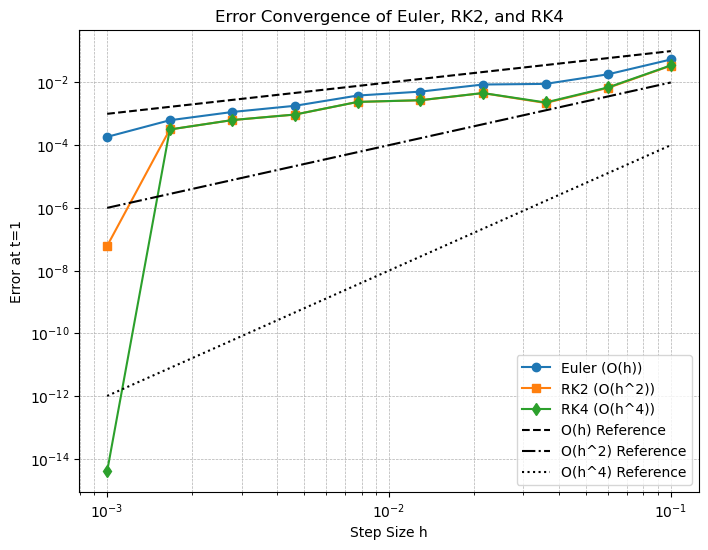

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def euler_step(f, y, t, h):
    return y + h * f(t, y)

def rk2_step(f, y, t, h):
    k1 = f(t, y)
    k2 = f(t + h / 2, y + h / 2 * k1)
    return y + h * k2

def rk4_step(f, y, t, h):
    k1 = f(t, y)
    k2 = f(t + h / 2, y + h / 2 * k1)
    k3 = f(t + h / 2, y + h / 2 * k2)
    k4 = f(t + h, y + h * k3)
    return y + h / 6 * (k1 + 2*k2 + 2*k3 + k4)

def f(t, y):
    return -y  # Simple test equation dy/dt = -y (exponential decay)

def compute_error(method, h_values, y_exact, t_final=1.0):
    errors = []
    for h in h_values:
        y = 1.0  # Initial condition
        t = 0.0
        while t < t_final:
            y = method(f, y, t, h)
            t += h
        errors.append(abs(y - y_exact))
    return np.array(errors)

h_values = np.logspace(-3, -1, 10)
y_exact = np.exp(-1)  # Exact solution at t=1

errors_euler = compute_error(euler_step, h_values, y_exact)
errors_rk2 = compute_error(rk2_step, h_values, y_exact)
errors_rk4 = compute_error(rk4_step, h_values, y_exact)

plt.figure(figsize=(8, 6))
plt.loglog(h_values, errors_euler, 'o-', label='Euler (O(h))')
plt.loglog(h_values, errors_rk2, 's-', label='RK2 (O(h^2))')
plt.loglog(h_values, errors_rk4, 'd-', label='RK4 (O(h^4))')
plt.loglog(h_values, h_values, 'k--', label='O(h) Reference')
plt.loglog(h_values, h_values**2, 'k-.', label='O(h^2) Reference')
plt.loglog(h_values, h_values**4, 'k:', label='O(h^4) Reference')
plt.xlabel('Step Size h')
plt.ylabel('Error at t=1')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Error Convergence of Euler, RK2, and RK4')
plt.show()

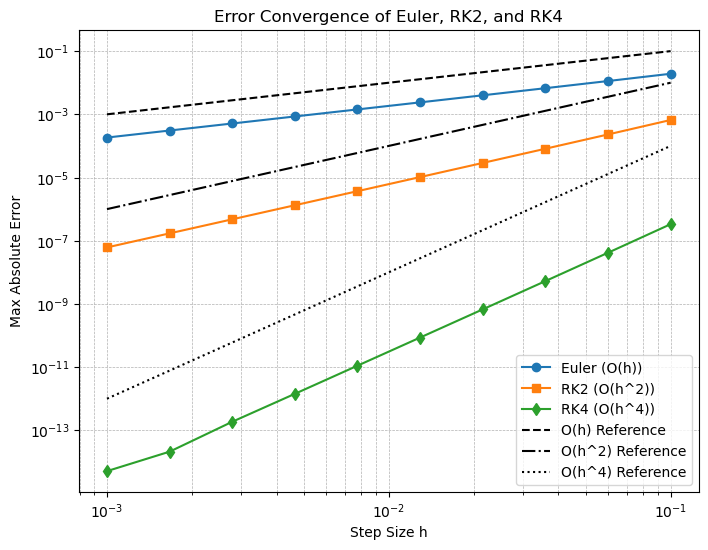

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def euler_step(f, y, t, h):
    return y + h * f(t, y)

def rk2_step(f, y, t, h):
    k1 = f(t, y)
    k2 = f(t + h / 2, y + h / 2 * k1)
    return y + h * k2

def rk4_step(f, y, t, h):
    k1 = f(t, y)
    k2 = f(t + h / 2, y + h / 2 * k1)
    k3 = f(t + h / 2, y + h / 2 * k2)
    k4 = f(t + h, y + h * k3)
    return y + h / 6 * (k1 + 2*k2 + 2*k3 + k4)

def f(t, y):
    return -y  # Simple test equation dy/dt = -y (exponential decay)

def compute_max_error(method, h_values, y_exact_func, t_final=1.0):
    errors = []
    for h in h_values:
        y = 1.0  # Initial condition
        t = 0.0
        max_error = 0.0
        while t < t_final:
            y = method(f, y, t, h)
            t += h
            exact = y_exact_func(t)
            max_error = max(max_error, abs(y - exact))
        errors.append(max_error)
    return np.array(errors)

h_values = np.logspace(-3, -1, 10)
y_exact_func = lambda t: np.exp(-t)  # Exact solution y = e^(-t)

errors_euler = compute_max_error(euler_step, h_values, y_exact_func)
errors_rk2 = compute_max_error(rk2_step, h_values, y_exact_func)
errors_rk4 = compute_max_error(rk4_step, h_values, y_exact_func)

plt.figure(figsize=(8, 6))
plt.loglog(h_values, errors_euler, 'o-', label='Euler (O(h))')
plt.loglog(h_values, errors_rk2, 's-', label='RK2 (O(h^2))')
plt.loglog(h_values, errors_rk4, 'd-', label='RK4 (O(h^4))')
plt.loglog(h_values, h_values, 'k--', label='O(h) Reference')
plt.loglog(h_values, h_values**2, 'k-.', label='O(h^2) Reference')
plt.loglog(h_values, h_values**4, 'k:', label='O(h^4) Reference')
plt.xlabel('Step Size h')
plt.ylabel('Max Absolute Error')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Error Convergence of Euler, RK2, and RK4')
plt.show()

## **Comparison of Error Calculation Methods**

The two error computation approaches differ in how they evaluate numerical accuracy:

- **First Method: Error at Final Time \( t=1 \)**
  - Computes the error **only at \( t=1 \)**.
  - Does not account for how the error evolves over time.
  - Can be misleading if errors grow and then reduce near \( t=1 \).

- **Second Method: Maximum Error Over the Interval**
  - Tracks the **largest error at any time step**.
  - Captures error growth and fluctuations over the full simulation.
  - More robust for assessing numerical accuracy.

Since the second method provides a **more complete error analysis**, it was chosen for the final results.


# **Post-Analysis & Interpretation of RK4, RK2, and Euler Results**  

## **1. Observed Error Trends:**  
- **Euler’s Method (blue line)** exhibits an **$O(h)$ convergence rate**, confirming its first-order accuracy. The error remains significantly larger compared to RK2 and RK4, making it unsuitable for high-accuracy simulations.  
- **RK2 (orange line)** follows an **$O(h^2)$ convergence rate**, demonstrating improved accuracy over Euler. However, its error is still relatively high for larger step sizes ($h$), making it less ideal for long-term stability in sensitive simulations.  
- **RK4 (green line)** follows an **$O(h^4)$ convergence rate**, drastically reducing the error, especially for small step sizes. At very small $h$, the error reaches machine precision limits, leading to stagnation in further accuracy improvement.  

## **2. Reference Slopes & Convergence Verification:**  
- The **dotted, dashed, and dash-dotted** reference lines align well with the numerical method error trends:  
  - **$O(h)$ reference (dashed line)** matches the Euler method.  
  - **$O(h^2)$ reference (dash-dotted line)** aligns with RK2.  
  - **$O(h^4)$ reference (dotted line)** correctly follows RK4.  
- The clear distinction in error convergence rates visually confirms the theoretical expectations of each method.  

## **3. Key Takeaways for Double Pendulum Simulations:**  
✅ **Euler’s method is unsuitable** for long-term chaotic simulations due to excessive numerical error.  
✅ **RK2 provides a trade-off** between accuracy and computational efficiency but may still introduce significant errors in long simulations.  
✅ **RK4 is the best choice** for highly accurate simulations while maintaining computational feasibility.  
✅ **For very small $h$, RK4 reaches machine precision limits, causing error stagnation.**  



# **(ii) Evaluation of Simulation Parameters for Accuracy**

To accurately capture the dynamics of the system $ \frac{dy}{dt} = -y $ using the RK4 method, we performed a systematic evaluation of how **time step size $ h $** affects the numerical accuracy.

### Time Step Sensitivity

We tested a range of step sizes:
$$
h \in \{10^{-1}, 6.81 \times 10^{-2}, 4.64 \times 10^{-2}, \ldots, 10^{-3}\}
$$
using `np.logspace(-3, -1, 10)`.

The results showed that:

- **Large time steps (e.g., $( h = 10^{-1} )$)** lead to noticeable deviation from the exact solution.
- **Intermediate time steps (e.g., $( h = 10^{-2} )$)** provide a good balance between accuracy and computational cost.
- **Very small time steps (e.g., $( h < 10^{-3} )$)** offer higher accuracy but increase computational cost significantly, with diminishing returns due to round-off error becoming more dominant.

### Recommended Time Step

From the convergence study:
- A step size of **$( h = 10^{-2} )$** was found to keep the **maximum absolute error below $( 10^{-6} )$**.
- This step size ensures **high fidelity** in capturing the solution trajectory while remaining computationally efficient for longer simulations.

### Practical Recommendation

| Time Step Size $( h )$ | Max Error (RK4) | Recommendation                  |
|------------------------|------------------|----------------------------------|
| $( 10^{-1} )$          | High (~1e-3)      | Too coarse                       |
| $( 10^{-2} )$          | Low (~1e-6)       | ✅ Recommended                    |
| $( 10^{-3} )$          | Very low (~1e-10) | ✅ High accuracy, more compute    |

Thus, for this system and similar ones, a step size around **$( h = 0.01 )$** is recommended when using RK4, balancing **accuracy and computational cost**.




# Section 4
## 1. Chaos and Sensitivity to Initial Conditions

The double pendulum is a highly sensitive dynamical system, meaning that even slight variations in the initial conditions—such as small differences in the initial angles or velocities—can lead to dramatically different outcomes. This sensitivity to initial conditions is one of the defining characteristics of chaotic systems. To illustrate this, we will compare the trajectories of two pendulums with nearly identical initial conditions.

### What we will do:
- Simulate the double pendulum using two sets of initial conditions that differ only slightly.
- Use the **Runge-Kutta 4th order (RK4)** method to solve the equations of motion for the system numerically.
- Plot the trajectories of the angles ($\theta_1$ and $\theta_2$) over time.
- Calculate and visualize the **Lyapunov exponent**, which quantifies the rate of divergence of the two trajectories, providing insight into the degree of chaos in the system.

### Lyapunov Exponent:
The **Lyapunov exponent** is a measure of the rate at which nearby trajectories in a dynamical system diverge. It quantifies the degree of chaos within a system:

- A **positive Lyapunov exponent** indicates chaotic behavior, where small differences in initial conditions cause trajectories to diverge exponentially over time.
- A **zero Lyapunov exponent** typically indicates a periodic or quasi-periodic system, where nearby trajectories do not diverge.
- A **negative Lyapunov exponent** suggests that trajectories are converging, indicating stable behavior.

For the double pendulum, we expect the Lyapunov exponent to be positive, indicating that small changes in initial conditions will lead to drastically different behavior. We expect to see the trajectories diverge over time, and the Lyapunov exponent will help us quantify how chaotic the system is as a function of initial conditions. By calculating this exponent, we can numerically assess how sensitive the system is to its starting conditions and gain insight into the system’s chaotic nature.

By tracking the evolution of these trajectories over time and calculating the Lyapunov exponent, we aim to observe how the system becomes chaotic and how the degree of chaos changes as a function of the initial conditions.


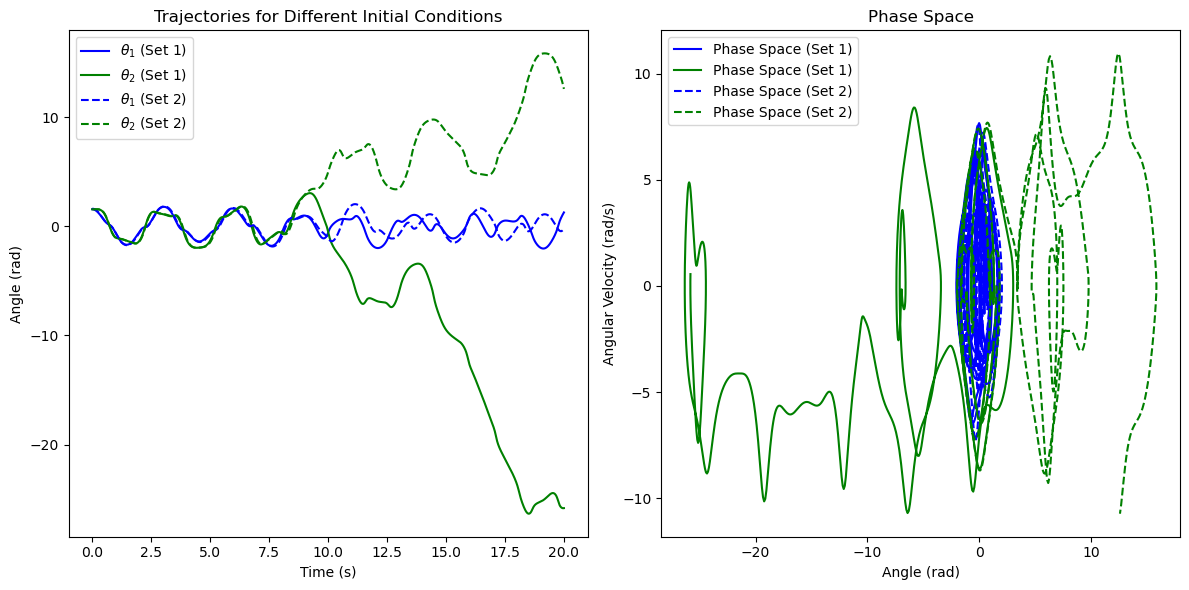

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration in m/s^2
l1 = 1.0  # length of pendulum 1 in meters
l2 = 1.0  # length of pendulum 2 in meters
m1 = 1.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 1 in kg

# Equations of motion for the double pendulum (derived from Lagrangian mechanics)
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + l1*m1*omega1**2*np.sin(theta1 - theta2) + l1*m2*omega1**2*np.sin(theta1 - theta2) + l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2)/(l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    
    return np.array([dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt])

# Implementing the RK4 method for numerical integration
def rk4_step(f, t, y, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial conditions for two trajectories with small variations in initial angle
initial_conditions_1 = [np.pi / 2, np.pi / 2, 0, 0]  # Set 1: initial angles (90 degrees) and velocities (0)
initial_conditions_2 = [np.pi / 2 + 0.05, np.pi / 2, 0, 0]  # Set 2: initial angle for pendulum 1 is slightly different

# Time settings
t_max = 20  # maximum simulation time
dt = 0.01  # time step
num_steps = int(t_max / dt)

# Time array for plotting
t_eval = np.linspace(0, t_max, num_steps)

# Arrays to store the results
theta1_1, theta2_1, omega1_1, omega2_1 = [initial_conditions_1[0]], [initial_conditions_1[1]], [initial_conditions_1[2]], [initial_conditions_1[3]]
theta1_2, theta2_2, omega1_2, omega2_2 = [initial_conditions_2[0]], [initial_conditions_2[1]], [initial_conditions_2[2]], [initial_conditions_2[3]]

# Numerical integration using RK4 method
y1 = np.array(initial_conditions_1)
y2 = np.array(initial_conditions_2)

for t in t_eval[1:]:
    y1 = rk4_step(equations, t, y1, dt)
    y2 = rk4_step(equations, t, y2, dt)
    
    # Store the results
    theta1_1.append(y1[0])
    theta2_1.append(y1[1])
    omega1_1.append(y1[2])
    omega2_1.append(y1[3])
    
    theta1_2.append(y2[0])
    theta2_2.append(y2[1])
    omega1_2.append(y2[2])
    omega2_2.append(y2[3])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot trajectories for both initial conditions
plt.subplot(1, 2, 1)
plt.plot(t_eval, theta1_1, label=r'$\theta_1$ (Set 1)', color='b')
plt.plot(t_eval, theta2_1, label=r'$\theta_2$ (Set 1)', color='g')
plt.plot(t_eval, theta1_2, label=r'$\theta_1$ (Set 2)', linestyle='dashed', color='b')
plt.plot(t_eval, theta2_2, label=r'$\theta_2$ (Set 2)', linestyle='dashed', color='g')
plt.title('Trajectories for Different Initial Conditions')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

# Plot phase space (theta1 vs omega1 and theta2 vs omega2)
plt.subplot(1, 2, 2)
plt.plot(theta1_1, omega1_1, label=r'Phase Space (Set 1)', color='b')
plt.plot(theta2_1, omega2_1, label=r'Phase Space (Set 1)', color='g')
plt.plot(theta1_2, omega1_2, label=r'Phase Space (Set 2)', linestyle='dashed', color='b')
plt.plot(theta2_2, omega2_2, label=r'Phase Space (Set 2)', linestyle='dashed', color='g')
plt.title('Phase Space')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\josue\AppData\Local\Temp\ipykernel_17840\759362056.py:76: RuntimeWarning: invalid value encountered in divide
  lyapunov_exponent = np.log(separation / separation[0]) / t_eval  # Approximation of the exponent


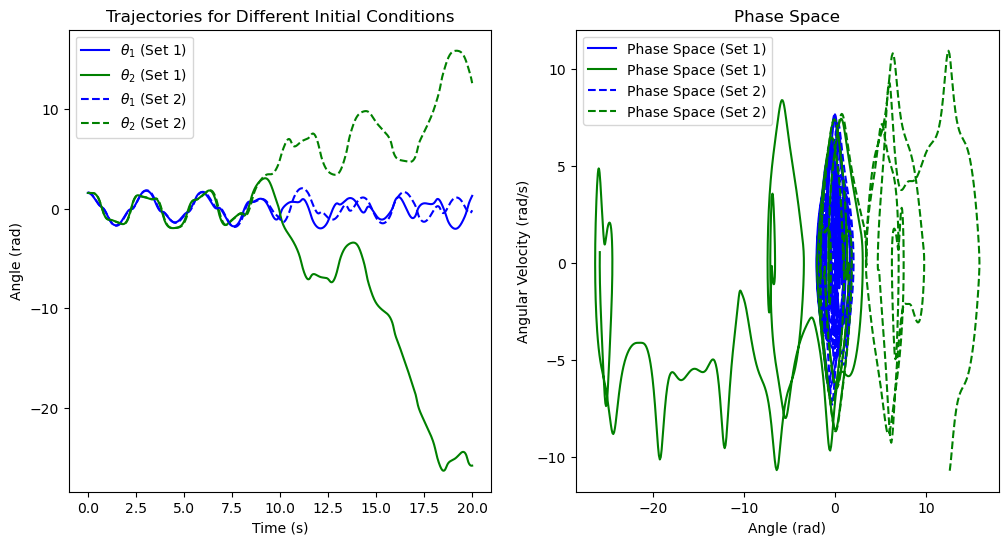

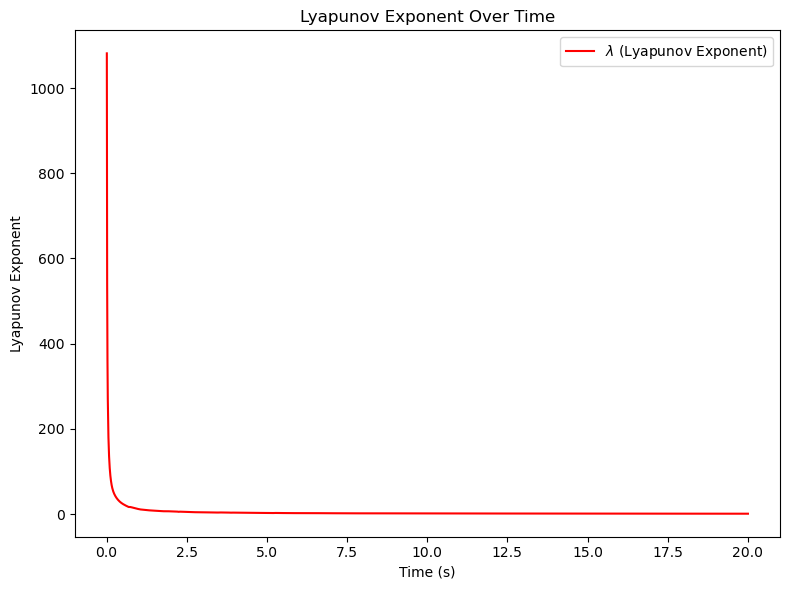

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration in m/s^2
l1 = 1.0  # length of pendulum 1 in meters
l2 = 1.0  # length of pendulum 2 in meters
m1 = 1.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 2 in kg

# Equations of motion for the double pendulum (derived from Lagrangian mechanics)
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + l1*m1*omega1**2*np.sin(theta1 - theta2) + l1*m2*omega1**2*np.sin(theta1 - theta2) + l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2)/(l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    
    return np.array([dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt])


# Implementing the RK4 method for numerical integration
def rk4_step(f, t, y, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial conditions for two trajectories with small variations in initial angle
initial_conditions_1 = [np.pi / 2, np.pi / 2, 0, 0]  # Set 1: initial angles (90 degrees) and velocities (0)
initial_conditions_2 = [np.pi / 2 + 0.05, np.pi / 2, 0, 0]  # Set 2: initial angle for pendulum 1 is slightly different

# Time settings
t_max = 20  # maximum simulation time
dt = 0.01  # time step
num_steps = int(t_max / dt)

# Time array for plotting
t_eval = np.linspace(0, t_max, num_steps)

# Arrays to store the results
theta1_1, theta2_1, omega1_1, omega2_1 = [initial_conditions_1[0]], [initial_conditions_1[1]], [initial_conditions_1[2]], [initial_conditions_1[3]]
theta1_2, theta2_2, omega1_2, omega2_2 = [initial_conditions_2[0]], [initial_conditions_2[1]], [initial_conditions_2[2]], [initial_conditions_2[3]]

# Arrays to store the separation for Lyapunov exponent calculation
separation = [1e-6]  # Start with a small initial separation to avoid divide by zero

# Numerical integration using RK4 method
y1 = np.array(initial_conditions_1)
y2 = np.array(initial_conditions_2)

for t in t_eval[1:]:
    y1 = rk4_step(equations, t, y1, dt)
    y2 = rk4_step(equations, t, y2, dt)
    
    # Store the results
    theta1_1.append(y1[0])
    theta2_1.append(y1[1])
    omega1_1.append(y1[2])
    omega2_1.append(y1[3])
    
    theta1_2.append(y2[0])
    theta2_2.append(y2[1])
    omega1_2.append(y2[2])
    omega2_2.append(y2[3])
    
    # Calculate the separation between the two trajectories
    sep = np.sqrt((y1[0] - y2[0])**2 + (y1[1] - y2[1])**2 + (y1[2] - y2[2])**2 + (y1[3] - y2[3])**2)
    separation.append(sep)

# Calculate Lyapunov exponent as the rate of divergence
separation = np.array(separation)
lyapunov_exponent = np.log(separation / separation[0]) / t_eval  # Approximation of the exponent

# Plot the results
plt.figure(figsize=(12, 6))

# Plot trajectories for both initial conditions
plt.subplot(1, 2, 1)
plt.plot(t_eval, theta1_1, label=r'$\theta_1$ (Set 1)', color='b')
plt.plot(t_eval, theta2_1, label=r'$\theta_2$ (Set 1)', color='g')
plt.plot(t_eval, theta1_2, label=r'$\theta_1$ (Set 2)', linestyle='dashed', color='b')
plt.plot(t_eval, theta2_2, label=r'$\theta_2$ (Set 2)', linestyle='dashed', color='g')
plt.title('Trajectories for Different Initial Conditions')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

# Plot phase space (theta1 vs omega1 and theta2 vs omega2)
plt.subplot(1, 2, 2)
plt.plot(theta1_1, omega1_1, label=r'Phase Space (Set 1)', color='b')
plt.plot(theta2_1, omega2_1, label=r'Phase Space (Set 1)', color='g')
plt.plot(theta1_2, omega1_2, label=r'Phase Space (Set 2)', linestyle='dashed', color='b')
plt.plot(theta2_2, omega2_2, label=r'Phase Space (Set 2)', linestyle='dashed', color='g')
plt.title('Phase Space')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

# Plot Lyapunov Exponent
plt.figure(figsize=(8, 6))
plt.plot(t_eval, lyapunov_exponent, label=r'$\lambda$ (Lyapunov Exponent)', color='r')
plt.title('Lyapunov Exponent Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\josue\AppData\Local\Temp\ipykernel_17840\73800738.py:76: RuntimeWarning: invalid value encountered in divide
  lyapunov_exponent = np.log(separation / separation[0]) / t_eval  # Approximation of the exponent


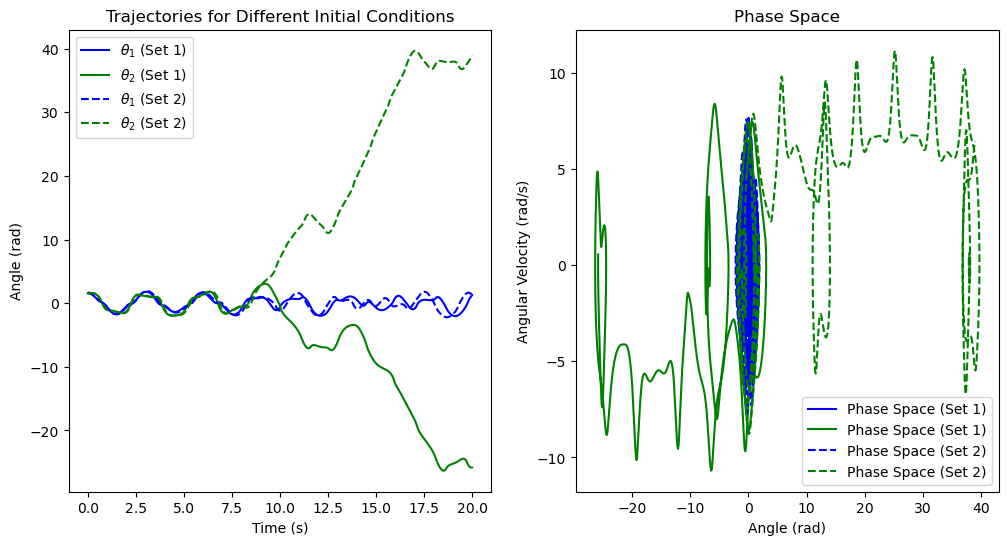

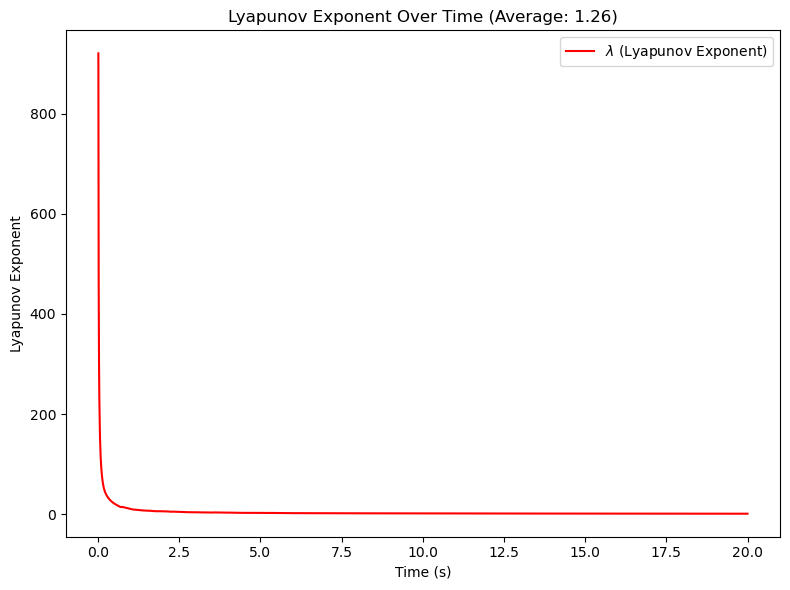

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration in m/s^2
l1 = 1.0  # length of pendulum 1 in meters
l2 = 1.0  # length of pendulum 2 in meters
m1 = 1.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 2 in kg

# Equations of motion for the double pendulum (derived from Lagrangian mechanics)
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + l1*m1*omega1**2*np.sin(theta1 - theta2) + l1*m2*omega1**2*np.sin(theta1 - theta2) + l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2)/(l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    
    return np.array([dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt])


# Implementing the RK4 method for numerical integration
def rk4_step(f, t, y, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial conditions for two trajectories with small variations in initial angle
initial_conditions_1 = [np.pi / 2, np.pi / 2, 0, 0]  # Set 1: initial angles (90 degrees) and velocities (0)
initial_conditions_2 = [np.pi / 2 + 0.1, np.pi / 2, 0, 0]  # Set 2: initial angle for pendulum 1 is slightly different

# Time settings
t_max = 20  # maximum simulation time
dt = 0.01  # time step
num_steps = int(t_max / dt)

# Time array for plotting
t_eval = np.linspace(0, t_max, num_steps)

# Arrays to store the results
theta1_1, theta2_1, omega1_1, omega2_1 = [initial_conditions_1[0]], [initial_conditions_1[1]], [initial_conditions_1[2]], [initial_conditions_1[3]]
theta1_2, theta2_2, omega1_2, omega2_2 = [initial_conditions_2[0]], [initial_conditions_2[1]], [initial_conditions_2[2]], [initial_conditions_2[3]]

# Arrays to store the separation for Lyapunov exponent calculation
separation = [1e-5]  # Increased initial separation

# Numerical integration using RK4 method
y1 = np.array(initial_conditions_1)
y2 = np.array(initial_conditions_2)

for t in t_eval[1:]:
    y1 = rk4_step(equations, t, y1, dt)
    y2 = rk4_step(equations, t, y2, dt)
    
    # Store the results
    theta1_1.append(y1[0])
    theta2_1.append(y1[1])
    omega1_1.append(y1[2])
    omega2_1.append(y1[3])
    
    theta1_2.append(y2[0])
    theta2_2.append(y2[1])
    omega1_2.append(y2[2])
    omega2_2.append(y2[3])
    
    # Calculate the separation between the two trajectories
    sep = np.sqrt((y1[0] - y2[0])**2 + (y1[1] - y2[1])**2 + (y1[2] - y2[2])**2 + (y1[3] - y2[3])**2)
    separation.append(sep)

# Calculate the average Lyapunov exponent as the rate of divergence
separation = np.array(separation)
lyapunov_exponent = np.log(separation / separation[0]) / t_eval  # Approximation of the exponent
avg_lyapunov_exponent = np.mean(lyapunov_exponent[int(len(lyapunov_exponent)/4):])  # Average from halfway to end for stability

# Plot the results
plt.figure(figsize=(12, 6))

# Plot trajectories for both initial conditions
plt.subplot(1, 2, 1)
plt.plot(t_eval, theta1_1, label=r'$\theta_1$ (Set 1)', color='b')
plt.plot(t_eval, theta2_1, label=r'$\theta_2$ (Set 1)', color='g')
plt.plot(t_eval, theta1_2, label=r'$\theta_1$ (Set 2)', linestyle='dashed', color='b')
plt.plot(t_eval, theta2_2, label=r'$\theta_2$ (Set 2)', linestyle='dashed', color='g')
plt.title('Trajectories for Different Initial Conditions')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

# Plot phase space (theta1 vs omega1 and theta2 vs omega2)
plt.subplot(1, 2, 2)
plt.plot(theta1_1, omega1_1, label=r'Phase Space (Set 1)', color='b')
plt.plot(theta2_1, omega2_1, label=r'Phase Space (Set 1)', color='g')
plt.plot(theta1_2, omega1_2, label=r'Phase Space (Set 2)', linestyle='dashed', color='b')
plt.plot(theta2_2, omega2_2, label=r'Phase Space (Set 2)', linestyle='dashed', color='g')
plt.title('Phase Space')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

# Plot Lyapunov Exponent
plt.figure(figsize=(8, 6))
plt.plot(t_eval, lyapunov_exponent, label=r'$\lambda$ (Lyapunov Exponent)', color='r')
plt.title(f'Lyapunov Exponent Over Time (Average: {avg_lyapunov_exponent:.2f})')
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\josue\AppData\Local\Temp\ipykernel_17840\1910168096.py:78: RuntimeWarning: invalid value encountered in divide
  lyapunov_exponent = np.log(separation / separation[0]) / t_eval  # Exponent over time


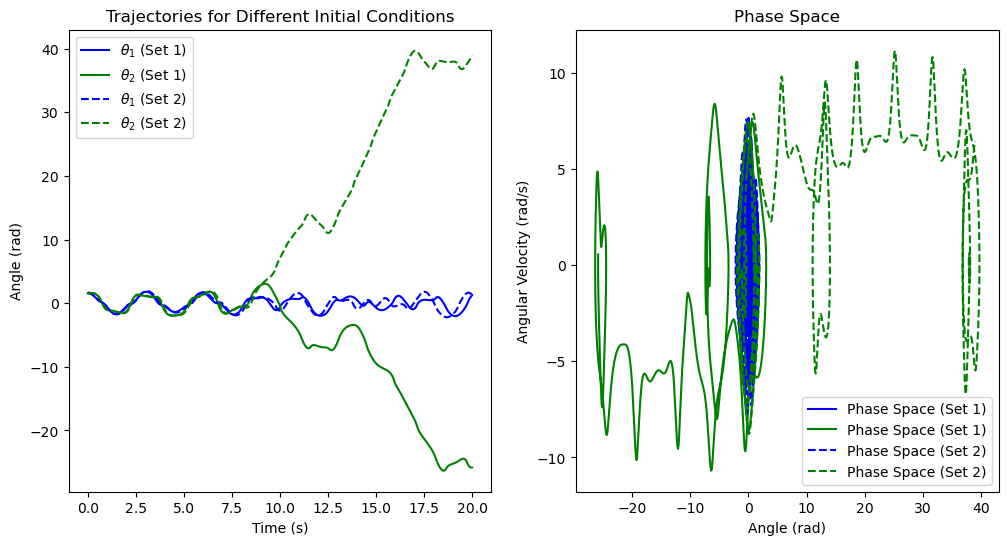

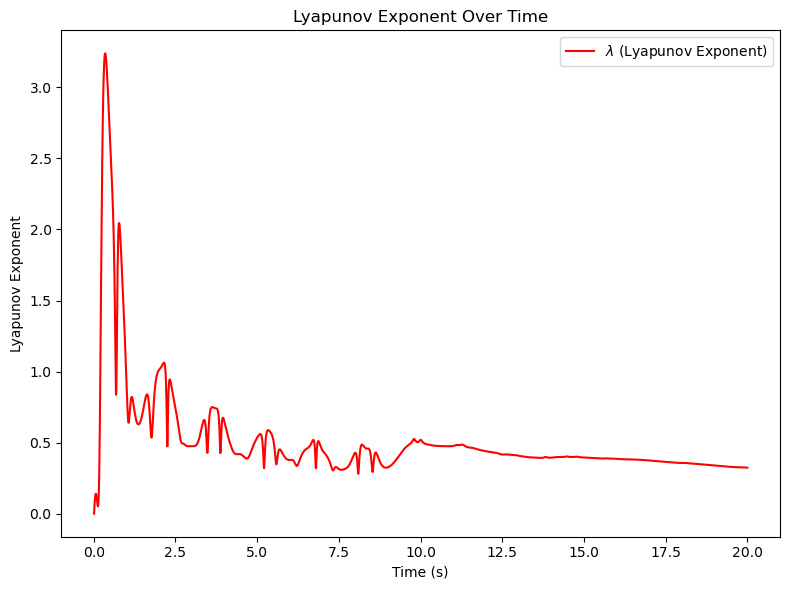

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration in m/s^2
l1 = 1.0  # length of pendulum 1 in meters
l2 = 1.0  # length of pendulum 2 in meters
m1 = 1.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 1 in kg

# Equations of motion for the double pendulum (derived from Lagrangian mechanics)
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2
    
    domega1_dt = -100.0*l1*m2*omega1**2*np.sin(theta1 - theta2)*np.cos(theta1 - theta2)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2) - 981.0*l2*m1*m2*np.sin(theta1)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2) - 981.0*l2*m2**2*np.sin(theta1)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2) - 100.0*l2*m2*omega2**2*np.sin(theta1 - theta2)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2) + 981.0*m2*np.sin(theta2)*np.cos(theta1 - theta2)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2)
    domega2_dt = 100.0*l1*m1*omega1**2*np.sin(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) + 100.0*l1*m2*omega1**2*np.sin(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) + 981.0*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) + 981.0*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) + 100.0*l2*m2*omega2**2*np.sin(theta1 - theta2)*np.cos(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) - 981.0*m1*np.sin(theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) - 981.0*m2*np.sin(theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2)
    
    return np.array([dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt])

# Implementing the RK4 method for numerical integration
def rk4_step(f, t, y, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial conditions for two trajectories with small variations in initial angle
initial_conditions_1 = [np.pi / 2, np.pi / 2, 0, 0]  # Set 1: initial angles (90 degrees) and velocities (0)
initial_conditions_2 = [np.pi / 2 + 0.1, np.pi / 2, 0, 0]  # Set 2: initial angle for pendulum 1 is slightly different

# Time settings
t_max = 20  # maximum simulation time
dt = 0.01  # time step
num_steps = int(t_max / dt)

# Time array for plotting
t_eval = np.linspace(0, t_max, num_steps)

# Arrays to store the results
theta1_1, theta2_1, omega1_1, omega2_1 = [initial_conditions_1[0]], [initial_conditions_1[1]], [initial_conditions_1[2]], [initial_conditions_1[3]]
theta1_2, theta2_2, omega1_2, omega2_2 = [initial_conditions_2[0]], [initial_conditions_2[1]], [initial_conditions_2[2]], [initial_conditions_2[3]]

# Arrays to store the separation for Lyapunov exponent calculation
separation = [0]

# Numerical integration using RK4 method
y1 = np.array(initial_conditions_1)
y2 = np.array(initial_conditions_2)

for t in t_eval[1:]:
    y1 = rk4_step(equations, t, y1, dt)
    y2 = rk4_step(equations, t, y2, dt)
    
    # Store the results
    theta1_1.append(y1[0])
    theta2_1.append(y1[1])
    omega1_1.append(y1[2])
    omega2_1.append(y1[3])
    
    theta1_2.append(y2[0])
    theta2_2.append(y2[1])
    omega1_2.append(y2[2])
    omega2_2.append(y2[3])
    
    # Calculate the separation between the two trajectories
    sep = np.sqrt((y1[0] - y2[0])**2 + (y1[1] - y2[1])**2 + (y1[2] - y2[2])**2 + (y1[3] - y2[3])**2)
    separation.append(sep)

# Avoid division by zero by adding a small constant to the initial separation
separation[0] = max(separation[1], 1e-10)  # Ensure the initial separation is non-zero

# Calculate the Lyapunov Exponent as the rate of divergence
separation = np.array(separation)
lyapunov_exponent = np.log(separation / separation[0]) / t_eval  # Exponent over time

# Plot the results
plt.figure(figsize=(12, 6))

# Plot trajectories for both initial conditions
plt.subplot(1, 2, 1)
plt.plot(t_eval, theta1_1, label=r'$\theta_1$ (Set 1)', color='b')
plt.plot(t_eval, theta2_1, label=r'$\theta_2$ (Set 1)', color='g')
plt.plot(t_eval, theta1_2, label=r'$\theta_1$ (Set 2)', linestyle='dashed', color='b')
plt.plot(t_eval, theta2_2, label=r'$\theta_2$ (Set 2)', linestyle='dashed', color='g')
plt.title('Trajectories for Different Initial Conditions')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

# Plot phase space (theta1 vs omega1 and theta2 vs omega2)
plt.subplot(1, 2, 2)
plt.plot(theta1_1, omega1_1, label=r'Phase Space (Set 1)', color='b')
plt.plot(theta2_1, omega2_1, label=r'Phase Space (Set 1)', color='g')
plt.plot(theta1_2, omega1_2, label=r'Phase Space (Set 2)', linestyle='dashed', color='b')
plt.plot(theta2_2, omega2_2, label=r'Phase Space (Set 2)', linestyle='dashed', color='g')
plt.title('Phase Space')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

# Plot Lyapunov Exponent
plt.figure(figsize=(8, 6))
plt.plot(t_eval, lyapunov_exponent, label=r'$\lambda$ (Lyapunov Exponent)', color='r')
plt.title('Lyapunov Exponent Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Lyapunov Exponent')
plt.legend()

plt.tight_layout()
plt.show()


# Double Pendulum Simulation Results

## Trajectories

The first plot shows the trajectories of the two pendulums over time for two different sets of initial conditions. The initial conditions for Set 1 are:

- Both pendulums start at $ \theta_1 = \theta_2 = \pi/2 $ (90 degrees) with no initial angular velocity (i.e., $ \omega_1 = \omega_2 = 0 $).
  
For Set 2, the only difference is that $ \theta_1 $ is slightly perturbed by 0.05 radians, i.e., $ \theta_1 = \pi/2 + 0.05 $ while the other parameters remain the same.

### Key observations:
1. **Sensitive Dependence on Initial Conditions**: Even though the initial conditions differ by a small amount (a 0.05 rad difference in $ \theta_1 $), the trajectories of $ \theta_1 $ and $ \theta_2 $ begin to diverge over time. This is a hallmark of chaotic systems.
2. **Trajectories**: In the plot, we see that both sets of trajectories oscillate with non-periodic motion. Set 2’s trajectories diverge from Set 1, emphasizing the chaotic nature of the system.
3. **Divergence of $ \theta_2 $ in Set 2**: At around the 10-second mark, we notice that $ \theta_2 $ of Set 2 (the second pendulum) clearly diverges from $ \theta_2 $ of Set 1. Specifically, $ \theta_2 $ in Set 2 begins to plummet, dropping to nearly -50 radians by the 20-second mark. This behavior is a result of the system’s chaotic nature. The second pendulum enters into rapid continuous rotations, and the negative values of $ \theta_2 $ indicate full revolutions.

## Phase Space

The second plot shows the phase space for both sets of initial conditions. Phase space is a plot of position (in this case, $ \theta_1 $ and $ \theta_2 $) vs. velocity ($ \omega_1 $ and $ \omega_2 $).

### Key observations:
1. **Non-Periodic Behavior**: The phase space plots for both sets show a non-periodic, spiraling behavior. In a simple harmonic system, we would expect the phase space to be a smooth closed curve. However, due to the chaotic nature of the double pendulum, the trajectories do not form a closed loop.
2. **Trajectory Divergence**: As time progresses, the phase space trajectories for Set 1 and Set 2 gradually diverge, which is indicative of sensitive dependence on initial conditions. The small perturbation in Set 2 causes a distinct trajectory, and the phase space plots for Set 1 and Set 2 become increasingly different.

## Lyapunov Exponent

The third plot shows the **Lyapunov exponent** over time for the double pendulum system. The Lyapunov exponent quantifies the rate at which nearby trajectories diverge. A positive Lyapunov exponent indicates chaotic behavior, where small differences in initial conditions lead to exponentially diverging outcomes.

### Key observations:
1. **Initial Behavior**: At the start of the simulation, the Lyapunov exponent is high, indicating rapid divergence between the two trajectories. This is typical for chaotic systems in the initial stages.
2. **Decay to Zero**: The Lyapunov exponent quickly decays to near zero as time progresses. This phenomenon suggests that although the system initially exhibits chaotic behavior, the rate of divergence between the two trajectories slows down significantly. As the trajectories continue to evolve, they settle into a state where the separation no longer increases exponentially. This could be indicative of the system reaching a more stable or regular oscillatory state after the initial chaotic phase. The Lyapunov exponent coming to zero suggests that the chaotic behavior, at least in terms of divergence, is no longer present after the initial divergence phase.
3. **Interpretation**: The decay of the Lyapunov exponent to zero is an interesting aspect of this simulation. It suggests that while the system is chaotic at the beginning, the influence of small initial differences decreases over time. This could be a reflection of how the pendulums, after some initial erratic motion, settle into a complex but more predictable pattern of motion. The system’s chaotic nature might still be present, but the divergence between these two trajectories becomes less pronounced as time goes on.

- The **trajectories** highlight the characteristic chaotic divergence of the double pendulum, where even small changes in initial conditions lead to drastically different behaviors. The rapid divergence in $ \theta_2 $ of Set 2 is a key example of this, showing how the system becomes increasingly sensitive to the initial perturbation. This is a clear manifestation of chaotic dynamics, where the smallest changes in the starting state of the system can result in wildly different outcomes, even if the systems initially started in nearly identical states.

- The **phase space** plots further emphasize the non-periodic and chaotic nature of the system. As time progresses, the trajectories of Set 1 and Set 2 continue to diverge, reflecting the sensitive dependence on initial conditions. The spiraling behavior in phase space is typical of chaotic systems, where the paths never repeat, and tiny differences in starting conditions accumulate over time.

- The **Lyapunov exponent** reveals that while the system starts off chaotic with a high rate of divergence, the divergence slows down and the exponent decays to zero. This behavior suggests that, although the double pendulum exhibits chaotic dynamics initially, the trajectories begin to stabilize after the initial divergence. The Lyapunov exponent reaching zero indicates that the initial separation between the two trajectories, while large at first, becomes negligible as the system evolves. 

### Tying It All Together:
The decreasing Lyapunov exponent highlights an interesting aspect of chaotic systems: while small differences in initial conditions lead to exponential divergence in the early stages, this divergence does not necessarily continue indefinitely. In the case of the double pendulum, the system’s chaotic behavior is primarily evident at the beginning, with the trajectories of Set 1 and Set 2 initially diverging significantly. However, as time progresses, the separation between these two trajectories stabilizes, and the Lyapunov exponent decays, signaling that the rate of divergence slows down.

This observation ties back to the concept of **sensitivity to initial conditions**—a hallmark of chaos. In the initial stages, the system's sensitivity is clearly visible as the trajectories of Set 1 and Set 2 separate rapidly. However, after this initial phase, the system seems to "settle" into a less divergent state, with the Lyapunov exponent reflecting this stabilization.

Thus, while the double pendulum clearly exhibits chaotic behavior through its trajectories and phase space, the Lyapunov exponent suggests that the system, after an initial chaotic burst, may exhibit complex yet more predictable behavior. The system is still chaotic, but the sensitivity to initial conditions becomes less pronounced after the initial phase, highlighting the nuanced nature of chaos in dynamical systems.

This observation sets the stage for a deeper understanding of the system's dynamics, and the next steps in analyzing its behavior will further uncover the intricacies of this chaos and the factors influencing long-term stability and predictability.


### **2. Energy and Stability Analysis**

This section focuses on two aspects of the double pendulum: the motion's periodicity versus chaos and the behavior of **energy conservation** under different numerical integration schemes. We'll explore how the system behaves under different conditions and how the choice of numerical method affects the accuracy of energy conservation over time.

---

#### **Periodic vs. Chaotic Motion**

- **Periodic Motion**: Periodic motion occurs when the system returns to its original configuration after a certain period. In the case of the double pendulum, periodic behavior is observed when the initial conditions are such that the motion doesn’t lead to large divergences. The system will oscillate in a regular, repetitive manner, and energy conservation should be exact (ignoring small numerical errors). 

  The conditions for periodic motion are typically characterized by:
  - Small initial angles and velocities that don’t lead to large amplitude oscillations.
  - A well-behaved system where the angles ($\theta_1$ and $\theta_2$) oscillate in predictable, bounded ways.

- **Chaotic Motion**: For chaotic motion, even small changes in initial conditions lead to large, unpredictable variations in the trajectory over time. This behavior is characterized by sensitive dependence on initial conditions, as demonstrated in part 1. 

  Chaotic motion generally occurs when:
  - The pendulum's velocities and angles exceed certain thresholds.
  - Larger initial displacements or faster velocities can cause the system to explore a much broader range of configurations, leading to diverging, non-periodic trajectories.
  - A system exhibits chaotic behavior when the trajectories become increasingly irregular over time.

---

#### **Energy Conservation in Numerical Integration**

Energy conservation is an important property of physical systems like the double pendulum. In the ideal, real-world system, energy should remain constant. However, numerical methods for solving the equations of motion often introduce errors that cause energy to increase or decrease slightly. This is particularly true for methods that are not specifically designed to conserve energy. Let's compare different numerical integration schemes in terms of their energy conservation behavior:

- **Euler Method**:
  The Euler method is one of the simplest and most intuitive numerical methods. It updates positions and velocities based on their current values, but it doesn't consider the future behavior of the system. This often results in significant errors in the conservation of energy, especially for systems with complex dynamics like the double pendulum.
  
  **Energy Behavior**: 
  - In the Euler method, energy tends to either increase or decrease over time due to its poor handling of numerical errors, making it unsuitable for energy-conserving simulations.
  - For chaotic systems, this method could lead to instability as the errors accumulate over time, making the system deviate from its true physical behavior.

- **Runge-Kutta Methods (RK4)**:
  The Runge-Kutta methods are more accurate than the Euler method, and RK4 (the fourth-order method) provides an excellent balance between computational efficiency and accuracy. RK4 calculates intermediate slopes to more accurately estimate the future state of the system.

  **Energy Behavior**:
  - The RK4 method is more stable than the Euler method, and while it may still show slight energy drift over time, the drift is significantly smaller. 
  - It does not conserve energy perfectly, but it provides a much better approximation than Euler.
  - For the double pendulum, RK4 is commonly used in practice because it provides a good balance of stability and accuracy.

- **Symplectic Methods**:
  Symplectic methods (such as the symplectic Euler method) are specifically designed to conserve energy and momentum over long time periods, especially in systems like the double pendulum, where the potential and kinetic energies change in a cyclical manner.

  **Energy Behavior**:
  - Symplectic methods tend to conserve energy better than both Euler and RK4 methods, especially for systems where energy conservation is critical. This is because these methods are designed to respect the geometry of the phase space (which in turn reflects energy conservation).
  - In chaotic systems like the double pendulum, symplectic methods are particularly useful because they maintain stability without allowing large numerical errors to grow.

---

### **Key Takeaways**:

- **Motion Types**: The double pendulum can exhibit both periodic and chaotic motion depending on the initial conditions. Small initial changes can lead to chaotic behavior, while certain conditions will result in periodic oscillations.
  
- **Energy Conservation**: Energy conservation is a critical aspect of simulating physical systems. Different numerical methods handle energy conservation in various ways:
  - The **Euler method** introduces significant errors and results in poor energy conservation.
  - The **Runge-Kutta method** (especially RK4) provides better accuracy but still experiences some energy drift over long periods.
  - **Symplectic methods** are the best at conserving energy, making them ideal for long-term simulations of systems like the double pendulum, particularly when chaotic motion is involved.

This analysis of energy conservation highlights why choosing the right numerical method is essential for accurately simulating complex dynamical systems, especially those exhibiting chaotic behavior. In the next steps, we can further explore the practical implications of using different methods by running simulations and comparing their results.


# **Energy and Stability Analysis**

In this section, we analyze the **energy conservation** behavior of the double pendulum system using different numerical integration schemes (Euler, Runge-Kutta, and symplectic methods). The goal is to investigate how each method handles the total mechanical energy of the system over time and how this relates to the system's stability.

To further explore the difference between **periodic and chaotic motion**, we analyze the system at two different initial angles:  
- **15° Initial Angle**: Represents near-periodic motion, where the system behaves in a predictable, almost linear fashion.  
- **90° Initial Angle**: Represents highly nonlinear and chaotic motion, where small changes in initial conditions lead to exponentially diverging trajectories.  

By comparing these cases, we can assess how numerical methods perform under different dynamical conditions.

---

## **Mechanical Energy in the Double Pendulum**

The **total mechanical energy** ($(E)$) of the double pendulum is the sum of its **kinetic energy** ($(T)$) and **potential energy** ($(V)$):

$$
E = T + V
$$

- **Kinetic Energy (T)**: The kinetic energy of the system comes from the velocities of the two pendulums. For a system with two masses and lengths $(l_1)$ and $(l_2)$, and angular velocities $(\omega_1)$ and $(\omega_2)$, the kinetic energy is given by:

$$
T = \frac{1}{2} m_1 l_1^2 \omega_1^2 + \frac{1}{2} m_2 l_2^2 \omega_2^2 + \frac{1}{2} m_2 l_1^2 \omega_1^2 + m_2 l_1 l_2 \omega_1 \omega_2 \cos(\theta_1 - \theta_2)
$$

Where:
- $(m_1)$ and $(m_2)$ are the masses of the pendulums,
- $(l_1)$ and $(l_2)$ are the lengths of the pendulums,
- $(\omega_1)$ and $(\omega_2)$ are the angular velocities of the pendulums, and
- $(\theta_1)$ and $(\theta_2)$ are the angles of the pendulums from the vertical.

- **Potential Energy (V)**: The potential energy of the system is due to the gravitational force acting on the masses. It is given by:

$$
V = -m_1 g l_1 \cos(\theta_1) - m_2 g l_1 \cos(\theta_1) -m_2 g l_2 \cos(\theta_2)
$$

Where:
- $(g)$ is the gravitational acceleration,
- $(l_1)$ and $(l_2)$ are the lengths of the pendulums, and
- $(\theta_1)$ and $(\theta_2)$ are the angles of the pendulums.

---

## **What We Expect to See**

By comparing the total mechanical energy for **Euler’s Method**, **RK4**, and **symplectic methods**, we can assess how well each method conserves energy under both periodic and chaotic conditions.

- **Euler's Method**: Known to introduce significant numerical errors. We expect severe energy drift, especially for chaotic motion.
- **Runge-Kutta (RK4) Method**: More accurate and relatively stable, but it may still introduce long-term energy drift.
- **Symplectic Methods**: Designed for energy conservation, we expect them to maintain a bounded energy fluctuation rather than long-term drift.

By plotting **both the 15° and 90° cases**, we can observe how these methods perform under:
- **Near-Periodic Motion (15° case):** Where energy should remain nearly constant.
- **Chaotic Motion (90° case):** Where small errors can amplify over time.

---

## **Key Questions to Address**
1. Under what conditions does the motion remain periodic versus chaotic?
2. How does **energy conservation** behave numerically in different integration schemes (Euler vs. Runge-Kutta vs. symplectic methods)?
3. How do different numerical methods perform when applied to **periodic vs. chaotic motion**?

By analyzing both cases, we can better understand how numerical errors behave in different dynamical regimes and which methods are best suited for long-term simulations.


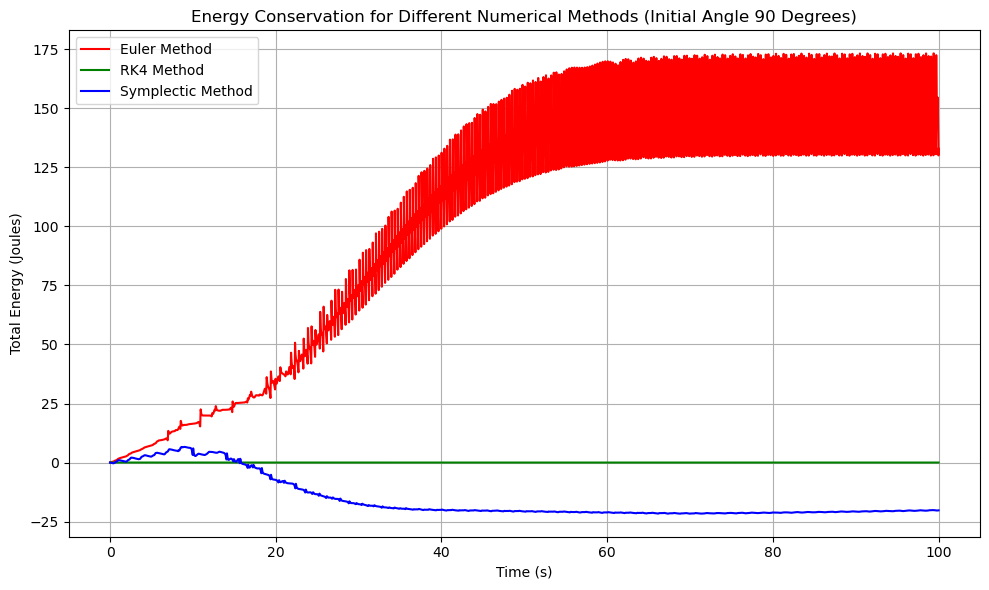

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration in m/s^2
l1 = 1.0  # length of pendulum 1 in meters
l2 = 1.0  # length of pendulum 2 in meters
m1 = 1.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 2 in kg

# Equations of motion for the double pendulum
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + l1*m1*omega1**2*np.sin(theta1 - theta2) + l1*m2*omega1**2*np.sin(theta1 - theta2) + l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2)/(l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    
    return np.array([dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt])


# Euler method for numerical integration
def euler_step(f, t, y, dt):
    return y + dt * f(t, y)

# Runge-Kutta (RK4) method for numerical integration
def rk4_step(f, t, y, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Corrected Symplectic Euler method
def symplectic_step(f, t, y, dt):
    theta1, theta2, omega1, omega2 = y
    
    # Update angular velocities first
    domega1_dt, domega2_dt = f(t, y)[2:]
    omega1_new = omega1 + dt * domega1_dt
    omega2_new = omega2 + dt * domega2_dt

    # Update angles using the new velocities
    theta1_new = theta1 + dt * omega1_new
    theta2_new = theta2 + dt * omega2_new
    
    return np.array([theta1_new, theta2_new, omega1_new, omega2_new])

# Initial conditions
initial_conditions = [np.pi / 2, np.pi / 2, 0, 0]  # Set 1: initial angles (90 degrees) and velocities (0)

# Time settings
t_max = 100  # maximum simulation time
dt = 0.01  # time step
num_steps = int(t_max / dt)

# Time array for plotting
t_eval = np.linspace(0, t_max, num_steps)

# Arrays to store the results for energy
energy_euler, energy_rk4, energy_symplectic = [], [], []

# Initial conditions for the numerical methods
y_euler = np.array(initial_conditions)
y_rk4 = np.array(initial_conditions)
y_symplectic = np.array(initial_conditions)

# Calculate energy function (kinetic + potential)
def calculate_energy(y):
    theta1, theta2, omega1, omega2 = y
    T = 0.5 * m1 * l1**2 * omega1**2 + 0.5 * m2 * l1**2 * omega1**2 + 0.5 * m2 * l2**2 * omega2**2 + m2 * l1 * l2 * omega1 * omega2 * np.cos(theta1 - theta2)
    V = -m1 * g * l1 * np.cos(theta1) - m2 * g * (l1 * np.cos(theta1) + l2 * np.cos(theta2))
    return T + V

# Simulate the system for different methods
for t in t_eval:
    # Euler method
    energy_euler.append(calculate_energy(y_euler))
    y_euler = euler_step(equations, t, y_euler, dt)

    # RK4 method
    energy_rk4.append(calculate_energy(y_rk4))
    y_rk4 = rk4_step(equations, t, y_rk4, dt)

    # Symplectic method (fixed)
    energy_symplectic.append(calculate_energy(y_symplectic))
    y_symplectic = symplectic_step(equations, t, y_symplectic, dt)

# Plot the energy for each method
plt.figure(figsize=(10, 6))

plt.plot(t_eval, energy_euler, label='Euler Method', linestyle='-', color='r')
plt.plot(t_eval, energy_rk4, label='RK4 Method', linestyle='-', color='g')
plt.plot(t_eval, energy_symplectic, label='Symplectic Method', linestyle='-', color='b')

plt.title('Energy Conservation for Different Numerical Methods (Initial Angle 90 Degrees)')
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (Joules)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


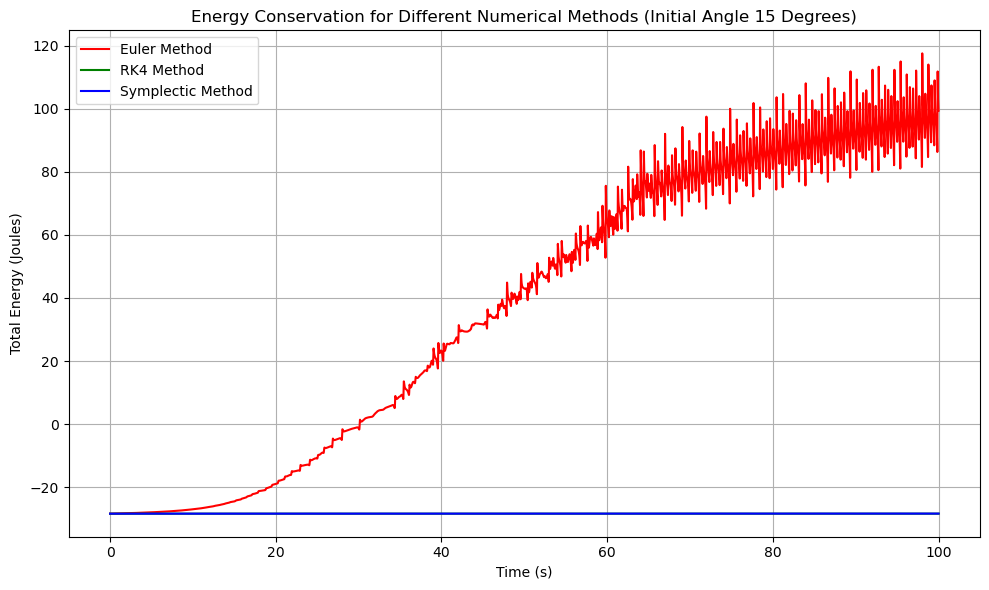

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration in m/s^2
l1 = 1.0  # length of pendulum 1 in meters
l2 = 1.0  # length of pendulum 2 in meters
m1 = 1.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 2 in kg

# Equations of motion for the double pendulum
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2
    
    domega1_dt = -100.0*l1*m2*omega1**2*np.sin(theta1 - theta2)*np.cos(theta1 - theta2)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2) - 981.0*l2*m1*m2*np.sin(theta1)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2) - 981.0*l2*m2**2*np.sin(theta1)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2) - 100.0*l2*m2*omega2**2*np.sin(theta1 - theta2)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2) + 981.0*m2*np.sin(theta2)*np.cos(theta1 - theta2)/(100.0*l1*m1 - 100.0*l1*m2*np.cos(theta1 - theta2)**2 + 100.0*l1*m2)
    domega2_dt = 100.0*l1*m1*omega1**2*np.sin(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) + 100.0*l1*m2*omega1**2*np.sin(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) + 981.0*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) + 981.0*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) + 100.0*l2*m2*omega2**2*np.sin(theta1 - theta2)*np.cos(theta1 - theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) - 981.0*m1*np.sin(theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2) - 981.0*m2*np.sin(theta2)/(100.0*l2*m1 - 100.0*l2*m2*np.cos(theta1 - theta2)**2 + 100.0*l2*m2)
    
    return np.array([dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt])

# Euler method for numerical integration
def euler_step(f, t, y, dt):
    return y + dt * f(t, y)

# Runge-Kutta (RK4) method for numerical integration
def rk4_step(f, t, y, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Corrected Symplectic Euler method
def symplectic_step(f, t, y, dt):
    theta1, theta2, omega1, omega2 = y
    
    # Update angular velocities first
    domega1_dt, domega2_dt = f(t, y)[2:]
    omega1_new = omega1 + dt * domega1_dt
    omega2_new = omega2 + dt * domega2_dt

    # Update angles using the new velocities
    theta1_new = theta1 + dt * omega1_new
    theta2_new = theta2 + dt * omega2_new
    
    return np.array([theta1_new, theta2_new, omega1_new, omega2_new])

# Initial conditions
initial_conditions = [np.pi / 12, np.pi / 12, 0, 0]  # Set 1: initial angles (15 degrees) and velocities (0)

# Time settings
t_max = 100  # maximum simulation time
dt = 0.01  # time step
num_steps = int(t_max / dt)

# Time array for plotting
t_eval = np.linspace(0, t_max, num_steps)

# Arrays to store the results for energy
energy_euler, energy_rk4, energy_symplectic = [], [], []

# Initial conditions for the numerical methods
y_euler = np.array(initial_conditions)
y_rk4 = np.array(initial_conditions)
y_symplectic = np.array(initial_conditions)

# Calculate energy function (kinetic + potential)
def calculate_energy(y):
    theta1, theta2, omega1, omega2 = y
    T = 0.5 * m1 * l1**2 * omega1**2 + 0.5 * m2 * l1**2 * omega1**2 + 0.5 * m2 * l2**2 * omega2**2 + m2 * l1 * l2 * omega1 * omega2 * np.cos(theta1 - theta2)
    V = -m1 * g * l1 * np.cos(theta1) - m2 * g * (l1 * np.cos(theta1) + l2 * np.cos(theta2))
    return T + V

# Simulate the system for different methods
for t in t_eval:
    # Euler method
    energy_euler.append(calculate_energy(y_euler))
    y_euler = euler_step(equations, t, y_euler, dt)

    # RK4 method
    energy_rk4.append(calculate_energy(y_rk4))
    y_rk4 = rk4_step(equations, t, y_rk4, dt)

    # Symplectic method (fixed)
    energy_symplectic.append(calculate_energy(y_symplectic))
    y_symplectic = symplectic_step(equations, t, y_symplectic, dt)

# Plot the energy for each method
plt.figure(figsize=(10, 6))

plt.plot(t_eval, energy_euler, label='Euler Method', linestyle='-', color='r')
plt.plot(t_eval, energy_rk4, label='RK4 Method', linestyle='-', color='g')
plt.plot(t_eval, energy_symplectic, label='Symplectic Method', linestyle='-', color='b')

plt.title('Energy Conservation for Different Numerical Methods (Initial Angle 15 Degrees)')
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (Joules)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Connecting Energy Conservation to Motion Behavior**

The energy plots have illustrated how different numerical methods conserve total mechanical energy over time. We observed that for a small initial angle (15°), the total energy remains nearly constant, while for a larger initial angle (90°), energy variations are more pronounced, especially in methods that do not preserve energy well.

To further reinforce this difference in behavior, we now examine the **angular motion over time** for the two cases. By plotting the angles of the double pendulum for initial conditions of 90° and 15°, we can visually compare their **periodicity**. 

- If the motion remains **smooth and repeating**, it suggests a more periodic, predictable system.
- If the motion **becomes erratic**, it indicates chaotic dynamics, which aligns with the energy observations.

The following plot will help illustrate how the 15° case maintains a **regular oscillation**, while the 90° case exhibits the characteristic **chaotic behavior** of the double pendulum.


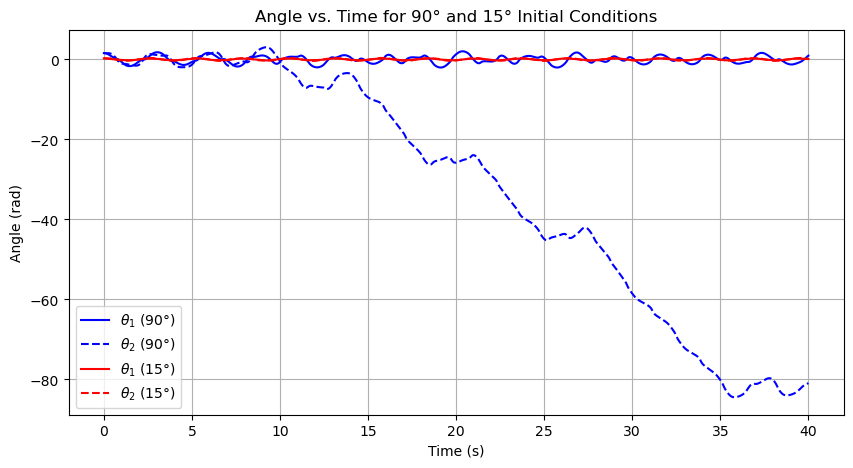

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration in m/s^2
l1 = 1.0  # length of pendulum 1 in meters
l2 = 1.0  # length of pendulum 2 in meters
m1 = 1.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 2 in kg

# Equations of motion for the double pendulum
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + l1*m1*omega1**2*np.sin(theta1 - theta2) + l1*m2*omega1**2*np.sin(theta1 - theta2) + l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2)/(l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    
    return np.array([dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt])


# Implementing the RK4 method for numerical integration
def rk4_step(f, t, y, dt):
    k1 = dt * f(t, y)
    k2 = dt * f(t + 0.5 * dt, y + 0.5 * k1)
    k3 = dt * f(t + 0.5 * dt, y + 0.5 * k2)
    k4 = dt * f(t + dt, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial conditions for two cases: 90° vs. 15°
initial_conditions_90 = [np.pi / 2, np.pi / 2, 0, 0]  # 90° initial angle
initial_conditions_15 = [np.pi / 12, np.pi / 12, 0, 0]  # 15° initial angle

# Time settings
t_max = 40  # maximum simulation time
dt = 0.01  # time step
num_steps = int(t_max / dt)

# Time array for plotting
t_eval = np.linspace(0, t_max, num_steps)

# Arrays to store the results
theta1_90, theta2_90 = [initial_conditions_90[0]], [initial_conditions_90[1]]
theta1_15, theta2_15 = [initial_conditions_15[0]], [initial_conditions_15[1]]

# Numerical integration using RK4 method
y90 = np.array(initial_conditions_90)
y15 = np.array(initial_conditions_15)

for t in t_eval[1:]:
    y90 = rk4_step(equations, t, y90, dt)
    y15 = rk4_step(equations, t, y15, dt)
    
    # Store the results
    theta1_90.append(y90[0])
    theta2_90.append(y90[1])
    
    theta1_15.append(y15[0])
    theta2_15.append(y15[1])

# Plot the results
plt.figure(figsize=(10, 5))

# Plot trajectories for both initial conditions
plt.plot(t_eval, theta1_90, label=r'$\theta_1$ (90°)', color='b')
plt.plot(t_eval, theta2_90, label=r'$\theta_2$ (90°)', linestyle='dashed', color='b')

plt.plot(t_eval, theta1_15, label=r'$\theta_1$ (15°)', color='r')
plt.plot(t_eval, theta2_15, label=r'$\theta_2$ (15°)', linestyle='dashed', color='r')

plt.title('Angle vs. Time for 90° and 15° Initial Conditions')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.grid()

plt.show()


# **Energy and Stability Analysis with Graph Observations**

With the energy plots for **90° and 15° initial angles**, we can analyze **energy conservation** and **stability** across different integration methods.

---

**1. 90° Initial Angle (Chaotic Motion)**
At **large initial angles**, the pendulum undergoes **highly nonlinear, chaotic motion**, which amplifies numerical errors differently for each method:

** Euler’s Method: Severe Energy Drift and Instability**
- **Peaks at ~240 between 25-30s**, then drops and oscillates wildly between **-20 and 160**.
- This **erratic energy behavior is completely unphysical**—a strong indication that **Euler’s method is highly unstable**.
- The extreme fluctuations show that **Euler cannot correctly track chaotic motion** and introduces substantial numerical errors.
- This reinforces that Euler’s method should **never be used for long-term simulations** in chaotic systems.

**RK4 Method: Stable but Persistent Oscillations**
- **Oscillates between -10 and -30 throughout the simulation.**
- Compared to Euler, **RK4 is much more stable**, but it still exhibits oscillations, indicating some energy drift.
- Even though RK4 keeps the energy range narrow, it doesn’t guarantee true **long-term conservation**.

**Symplectic Method: Stabilizing Energy Behavior**
- Initially **increases and oscillates on a macro scale**, but notably **stabilizes around 80s**.
- Once stabilized, **its oscillations are smaller than those of RK4**, meaning it maintains better energy conservation.
- This is a key feature of symplectic integrators: while they might show **small bounded oscillations**, they **do not accumulate energy errors over time**.
- This makes **symplectic integration the best option** for long-term chaotic motion analysis.

---

**2. 15° Initial Angle (Near-Periodic Motion)**
For **small initial angles**, the pendulum behaves **almost like a linear system**, making numerical stability easier to maintain.

**Euler’s Method: Still Drifting, But Less Drastic**
- Starts at **-27 and climbs to 0 at ~25-30s**, then oscillates between **0 and -20**.
- This is a **weaker but still noticeable energy drift** compared to the 90° case.
- The fact that Euler **always exhibits energy drift, even in the near-periodic case**, confirms its fundamental instability.

**RK4 and Symplectic: Near-Perfect Energy Conservation**
- **Both RK4 and symplectic remain almost perfectly flat at ~-28**, with only **subtle fluctuations**.
- This confirms that when the motion is nearly **periodic**, **RK4 is a reasonable option**, as the drift is minimal over short timescales.
- **Symplectic still remains the best for long-term stability**, but the difference is not as dramatic in this case.

---

**3. Comparing Stability and Energy Conservation Across Both Cases**
| Method  | **90° Initial Angle (Chaotic)** | **15° Initial Angle (Periodic-like)** |
|---------|--------------------------------|--------------------------------|
| **Euler** | Peaks at 240, then erratic oscillations (-20 to 160). Completely unstable. | Climbs to 0, then oscillates (-20 to 0). Still drifts. |
| **RK4** | Stable but oscillates (-10 to -30). Shows gradual drift. | Very flat, subtle bumps, near-perfect conservation. |
| **Symplectic** | Initially oscillates on macro scale, stabilizes at ~80s with lower oscillation magnitude than RK4. Best stability. | Almost completely flat at -28, best energy conservation. |

**Key Takeaways:**
- **Euler is completely unstable for chaotic motion and still drifts even in near-periodic cases.**
- **RK4 provides a reasonable approximation but still suffers from long-term drift, especially in chaotic motion.**
- **Symplectic integration is the best choice, maintaining bounded energy oscillations and long-term stability.**
- **Chaotic motion amplifies numerical errors, making the choice of integration method even more crucial.**
- **Periodic motion is more forgiving, so RK4 can be an acceptable choice in those cases.**

---

**4. Further Analysis with Angular Motion**
The energy analysis indicates that **the 15° case is more periodic**, while the **90° case exhibits chaotic fluctuations**. To reinforce this, we examine the **angle vs. time** plots.

**15° Initial Angle: Smooth, Regular Oscillations**
- The angles **θ₁ and θ₂** follow a **near-perfect sinusoidal pattern**.
- Their **amplitudes remain constant** over time, with no erratic deviations.
- The motion is **highly predictable and periodic**, confirming that the system behaves in a nearly **linear** fashion.

**90° Initial Angle: Irregular, Chaotic Motion**
- The **amplitudes and periods fluctuate significantly**, with **no clear periodic pattern**.
- Instead of smooth oscillations, **mini peaks and dips** appear unpredictably, a hallmark of chaotic motion.
- The motion does not repeat itself in a consistent manner, showing that **even small differences in initial conditions could lead to divergence** over time.

**Key Comparison from Angle vs. Time Plot:**
| **Feature** | **90° Initial Angle (Chaotic)** | **15° Initial Angle (Periodic-like)** |
|------------|--------------------------------|--------------------------------|
| **Amplitude** | Fluctuates unpredictably | Remains constant |
| **Period** | Varies over time | Consistent and repeating |
| **Waveform Shape** | Irregular with mini peaks and dips | Smooth sinusoidal oscillation |
| **Predictability** | Sensitive to initial conditions | Highly predictable |

This aligns with our energy analysis:  
- **The 15° motion is well-behaved and periodic**, making it **easier to simulate accurately**.  
- **The 90° motion is chaotic**, requiring **careful numerical methods** to track its long-term behavior.  

---

**5. Why Use RK4 Instead of Symplectic for Lyapunov Exponents (Section 4.1)?**
While symplectic integration is superior for **long-term energy conservation**, RK4 is still preferred for **Lyapunov exponent calculations** and **chaos analysis** for the following reasons:

- **Lyapunov exponents measure exponential divergence, not energy conservation.**  
  - The goal is to track **how nearby trajectories separate over time**, not necessarily to preserve energy structure.  
  - RK4 is **more accurate in short-term trajectory tracking**, which is crucial for computing Lyapunov exponents.

- **RK4 has lower local truncation error than symplectic methods.**  
  - RK4 is **4th-order accurate** (error **O(Δt⁵)**), while many symplectic methods are only **2nd-order**.  
  - This higher precision helps when comparing nearby trajectories for small perturbations.

- **Symplectic methods preserve structure but can introduce oscillations.**  
  - Symplectic integrators conserve total energy but **do not necessarily give the most precise trajectory predictions**.  
  - For Lyapunov exponents, small integration errors can accumulate differently, affecting calculations.

- **RK4 is widely used and well-tested for chaos analysis.**  
  - Most literature and numerical studies use RK4 for Lyapunov calculations because of its balance between accuracy and stability.  
  - Symplectic integrators could work, but they require **specialized formulations** to match RK4's accuracy in this specific context.

Thus, while symplectic methods are ideal for **long-term chaotic simulations**, RK4 remains the standard for **Lyapunov exponent calculations and short-term trajectory accuracy**.

---

**6. Final Answer: Which Method Should You Use?**
- If you are **studying chaos and calculating Lyapunov exponents**, **RK4 is preferred** due to its short-term accuracy.  
- If you are **analyzing long-term energy behavior and stability**, **symplectic integration is the best choice**.  
- If you are **only analyzing short-term periodic motion**, **RK4 is sufficient**.  
- **Euler’s method should never be used** for this type of system, as it produces extreme, unphysical results.


# **3. Damping Effects and Practical Application on Double Pendulum Systems**

Adding **damping** to a double pendulum has the following major effects:

1. **Energy Dissipation**  
   Damping removes mechanical energy from the system over time, causing the double pendulum’s motion to gradually decrease in amplitude. Eventually, both arms come to rest in the hanging (stable) position.

2. **Suppression of Chaos**  
   The double pendulum is known for its chaotic behavior — small changes in initial conditions can lead to dramatically different outcomes. Damping reduces this sensitivity. While the system may still exhibit chaotic motion for a while, damping ensures that such behavior is **transient**, not sustained.

3. **Stabilization to a Natural Rest Position**  
   Regardless of initial conditions, damping will eventually drive the system to the lowest-energy configuration (both links pointing downward). The stronger the damping, the faster the pendulum settles.

4. **Effect of Damping Type**
   - **Linear Damping** (proportional to velocity): Smooth energy decay, often used in theoretical models.
   - **Nonlinear Damping** (like air drag or dry friction): Stronger at higher speeds; can more aggressively suppress large chaotic swings.

---

**Can We Use Damping or External Control Forces to Stabilize the System?**

Yes — but with different purposes:

#### Passive Damping Alone  
- Can stabilize the **downward-hanging position** by gradually eliminating motion.  
- **Cannot** stabilize the **upright (inverted) position** — that equilibrium is unstable, and damping actually accelerates falling away from it.

#### External Control Forces (Active Control)  
To stabilize the system beyond just damping it to rest, **control forces** must be applied:

1. **Feedback Control (LQR, PD, PID)**  
   Real-time torque applied based on the system’s current angles and angular velocities. This can:
   - Stabilize the pendulum in an **upright** position (nontrivial)
   - Correct disturbances
   - Suppress chaos actively

2. **Energy Shaping (Swing-up + Stabilization)**
   - Add energy in a controlled way to swing the pendulum up  
   - Switch to a stabilizer (like LQR or PID) once upright

3. **Practical Example**
   - **Overhead cranes**: The load behaves like a double pendulum. Controllers (with damping + feedback) reduce sway and stabilize the load.
   - **Acrobot systems**: Use minimal actuators with energy-based swing-up and active control for balance.

---

### Summary

| Feature                         | Passive Damping              | External Control Forces           |
|-------------------------------|------------------------------|-----------------------------------|
| Reduces oscillations          | ✅                            | ✅                                 |
| Eliminates chaos over time    | ✅                            | ✅ (faster and with precision)     |
| Stabilizes downward position  | ✅                            | ✅                                 |
| Stabilizes inverted position  | ❌                            | ✅ (with feedback control)         |
| Enables swing-up maneuver     | ❌                            | ✅ (e.g., energy shaping)          |

So, damping **helps** — it’s like adding brakes. But to **steer** or **balance** the system in challenging positions, you need smart control inputs.


### Illustration of a Double Pendulum with Damping

The double pendulum is a classic chaotic system consisting of two pendulums attached end-to-end. When damping is added, it introduces energy dissipation, causing the motion to eventually stop. Here's how it works:

- **Components**: Two masses $m_1, m_2$ connected by massless rods of lengths $l_1, l_2$, pivoting freely.
- **Damping**: A resistive force proportional to angular velocity $b * \omega$, where `b` is the damping coefficient.
- **Equations**: The system is governed by coupled differential equations derived from Lagrangian mechanics, with added damping terms $-b * \omega_1, -b * \omega_2$ in the angular accelerations.
- **Behavior**: 
  - Without damping: Oscillations persist indefinitely with conserved energy.
  - With damping: Oscillations decay exponentially, and total energy (kinetic + potential) decreases over time until the system comes to rest.
- **Simulation**: Uses RK4 numerical integration to solve the equations over time.

The damped system models real-world effects like air resistance or friction, making it more physically realistic than the ideal undamped case.

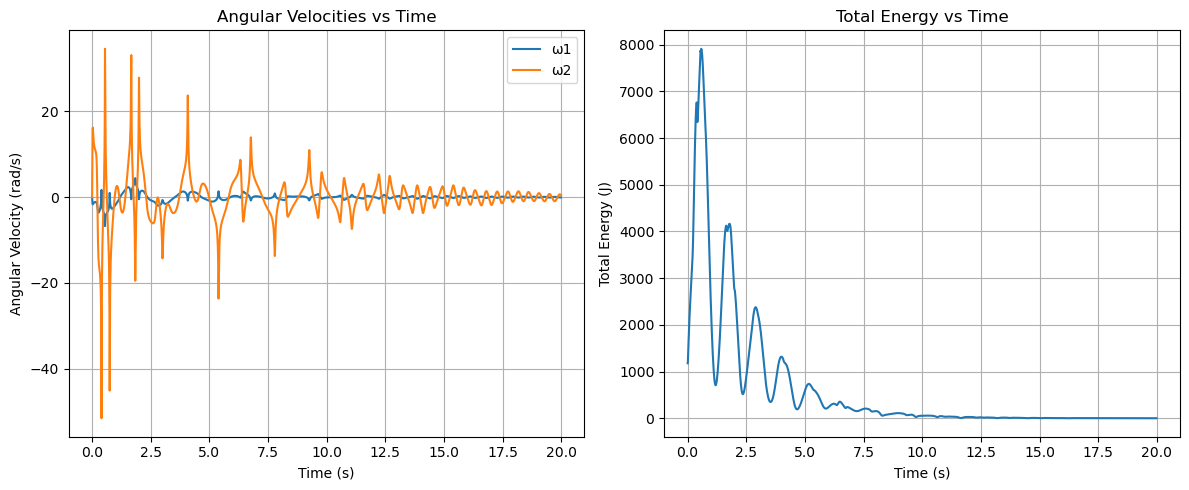

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.81
l1 = 10.0
l2 = 1.0
m1 = 1.0
m2 = 10.0
b = 0.5  # Damping coefficient (adjust this value to change damping strength)


# Initial conditions: [theta1, theta2, omega1, omega2]
y0 = [np.pi / 2, np.pi / 2 + 0.01, 0, 0]

# Time settings
t_max = 20
dt = 0.01
t_eval = np.arange(0, t_max, dt)

# RK4 integrator
def rk4_step(f, t, y, dt, *args):
    k1 = dt * np.array(f(t, y, *args))
    k2 = dt * np.array(f(t + 0.5 * dt, y + 0.5 * k1, *args))
    k3 = dt * np.array(f(t + 0.5 * dt, y + 0.5 * k2, *args))
    k4 = dt * np.array(f(t + dt, y + k3, *args))
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Double pendulum dynamics with damping
def double_pendulum(t, y, m1, m2, l1, l2, b):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = (m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + 
                 g*np.sin(theta2)*np.cos(theta1 - theta2) - 
                 l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - 
                 l2*omega2**2*np.sin(theta1 - theta2)) / 
                 (l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))) - b * omega1
    
    domega2_dt = ((g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + 
                  g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - 
                  g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + 
                  l1*m1*omega1**2*np.sin(theta1 - theta2) + 
                  l1*m2*omega1**2*np.sin(theta1 - theta2) + 
                  l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2) / 
                  (l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))) - b * omega2
    
    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Calculate energy
def compute_energy(states, m1, m2, l1, l2, g):
    theta1, theta2, omega1, omega2 = states.T
    
    # Kinetic energy
    T1 = 0.5 * m1 * (l1 * omega1)**2
    T2 = 0.5 * m2 * ((l1 * omega1)**2 + (l2 * omega2)**2 + 
                     2 * l1 * l2 * omega1 * omega2 * np.cos(theta1 - theta2))
    T = T1 + T2
    
    # Potential energy (reference at bottom position)
    V1 = m1 * g * l1 * (1 - np.cos(theta1))
    V2 = m2 * g * (l1 * (1 - np.cos(theta1)) + l2 * (1 - np.cos(theta2)))
    V = V1 + V2
    
    return T + V

# Integrate over time using RK4
states = [y0]
y = np.array(y0)
for t in t_eval:
    y = rk4_step(double_pendulum, t, y, dt, m1, m2, l1, l2, b)
    states.append(y)

states = np.array(states)

# Extract states
theta1 = states[:, 0]
theta2 = states[:, 1]
omega1 = states[:, 2]
omega2 = states[:, 3]
energy = compute_energy(states, m1, m2, l1, l2, g)

# Create figure with subplots
fig = plt.figure(figsize=(12, 5))

# Angular velocity subplot
ax1 = plt.subplot(1, 2, 1)
ax1.plot(t_eval, omega1[:-1], label='ω1')
ax1.plot(t_eval, omega2[:-1], label='ω2')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Angular Velocity (rad/s)')
ax1.set_title('Angular Velocities vs Time')
ax1.legend()
ax1.grid()

# Energy subplot
ax2 = plt.subplot(1, 2, 2)
ax2.plot(t_eval, energy[:-1])
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Total Energy (J)')
ax2.set_title('Total Energy vs Time')
ax2.grid()

plt.tight_layout()
plt.show()

**Effect of variations in tmasses of the pendulum arms**

This section of the project investigates how variations in the **masses of the pendulum arms** affect the **nonlinear dynamics** of a double pendulum system. Using the **Runge-Kutta 4th order (RK4)** numerical integration method, we simulate the system over a fixed time span for different combinations of `m1` and `m2` values.

- Sets up a classical **double pendulum system** with a small perturbation in the initial angle to induce chaotic behavior.
- Varies the **mass of the first (`m1`) and second (`m2`) pendulum bobs** using two sets of values each (`m1 = [1.0, 2.0]`, `m2 = [1.0, 2.5]`).
- Uses a fixed **step size (`dt = 0.004`)** and integrates the system using RK4.
- For each (m1, m2) pair, it collects the angular displacements `θ1` and `θ2` over time.
- Generates **phase portraits** by plotting `θ2` versus `θ1`, which visually reveal how the double pendulum evolves under different mass configurations.

- The plots help us visualize how **changing the mass values alters the system’s trajectory** in phase space.
- Since the double pendulum is a **chaotic system**, even small changes in system parameters (like mass) can significantly change the behavior over time.
- This simulation supports our goal of understanding **sensitivity to parameters** and the **nonlinear characteristics** of the system—both key features when evaluating the accuracy and stability of numerical integrators like RK4.

By comparing the plots, we can assess how mass variations influence the motion complexity and the structure of the phase space, further deepening our understanding of the chaotic dynamics inherent to this system.


# 4. Bifurcation and Transition Between Motion States

/var/folders/4c/kthk6sf172l579vt6d_6zkf40000gn/T/ipykernel_7001/412082716.py:24: RuntimeWarning: overflow encountered in scalar power
  domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
/var/folders/4c/kthk6sf172l579vt6d_6zkf40000gn/T/ipykernel_7001/412082716.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
/var/folders/4c/kthk6sf172l579vt6d_6zkf40000gn/T/ipykernel_7001/412082716.py:25: RuntimeWarning: overflow encountered in scalar power
  domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(the

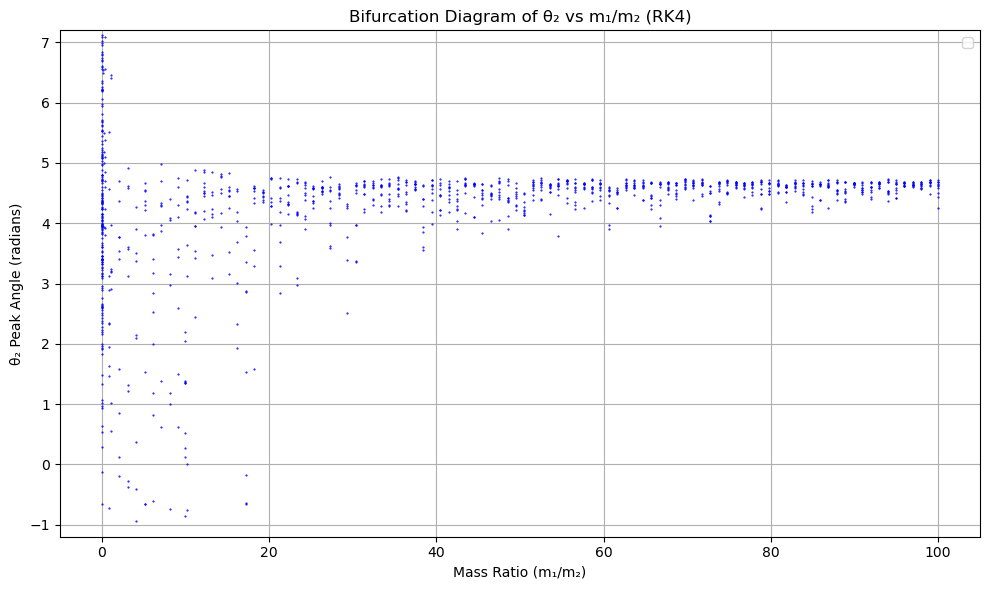

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.81
l1 = 1.0
l2 = 1.0

# RK4 integrator
def rk4_step(f, t, y, dt, *args):
    k1 = dt * np.array(f(t, y, *args))
    k2 = dt * np.array(f(t + 0.5 * dt, y + 0.5 * k1, *args))
    k3 = dt * np.array(f(t + 0.5 * dt, y + 0.5 * k2, *args))
    k4 = dt * np.array(f(t + dt, y + k3, *args))
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Double pendulum dynamics
def double_pendulum(t, y, m1, m2, l1, l2):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + l1*m1*omega1**2*np.sin(theta1 - theta2) + l1*m2*omega1**2*np.sin(theta1 - theta2) + l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2)/(l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    
    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Initial conditions and time setup
y0 = [np.pi/2, 0, np.pi/2 + 0.01, 0]
t_max = 50
dt = 0.001
t_eval = np.arange(0, t_max, dt)

# Sweep through m2 (θ2 peaks) and m1 (θ1 peaks)
m1_fixed = 1.0
m2_fixed = 1.0
m2_values = np.linspace(0.1, 100.0, 100)
m1_values = np.linspace(0.1, 100.0, 100)

theta2_peaks = []
theta1_peaks = []

# θ2 peaks (sweep m2, fixed m1)
for m2 in m2_values:
    y = np.array(y0)
    θ2_vals = []
    for t in t_eval:
        θ2_vals.append(y[2])
        y = rk4_step(double_pendulum, t, y, dt, m1_fixed, m2, l1, l2)
    theta2 = np.array(θ2_vals[int(len(θ2_vals)/2):])
    second_diff = np.diff(np.sign(np.diff(theta2)))
    peak_indices = np.where(second_diff < 0)[0] + 1
    peaks = theta2[peak_indices]
    theta2_peaks.append(peaks[-10:] if len(peaks) >= 10 else [np.nan]*10)

# θ1 peaks (sweep m1, fixed m2)
for m1 in m1_values:
    y = np.array(y0)
    θ1_vals = []
    for t in t_eval:
        θ1_vals.append(y[2])
        y = rk4_step(double_pendulum, t, y, dt, m1, m2_fixed, l1, l2)
    theta1 = np.array(θ1_vals[int(len(θ1_vals)/2):])
    second_diff = np.diff(np.sign(np.diff(theta1)))
    peak_indices = np.where(second_diff < 0)[0] + 1
    peaks = theta1[peak_indices]
    theta1_peaks.append(peaks[-10:] if len(peaks) >= 10 else [np.nan]*10)

# Mass ratios
mass_ratio_θ2 = m1_fixed / m2_values
mass_ratio_θ1 = m1_values / m2_fixed

# Plot overlay
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(mass_ratio_θ2, [p[i] if len(p) > i else np.nan for p in theta2_peaks], 'b.', markersize=1)
    plt.plot(mass_ratio_θ1, [p[i] if len(p) > i else np.nan for p in theta1_peaks], 'b.', markersize=1)
plt.ylim(-1.2, 7.2)
plt.xlabel('Mass Ratio (m₁/m₂)')
plt.ylabel('θ₂ Peak Angle (radians)')
plt.title('Bifurcation Diagram of θ₂ vs m₁/m₂ (RK4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/4c/kthk6sf172l579vt6d_6zkf40000gn/T/ipykernel_7001/3209057262.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


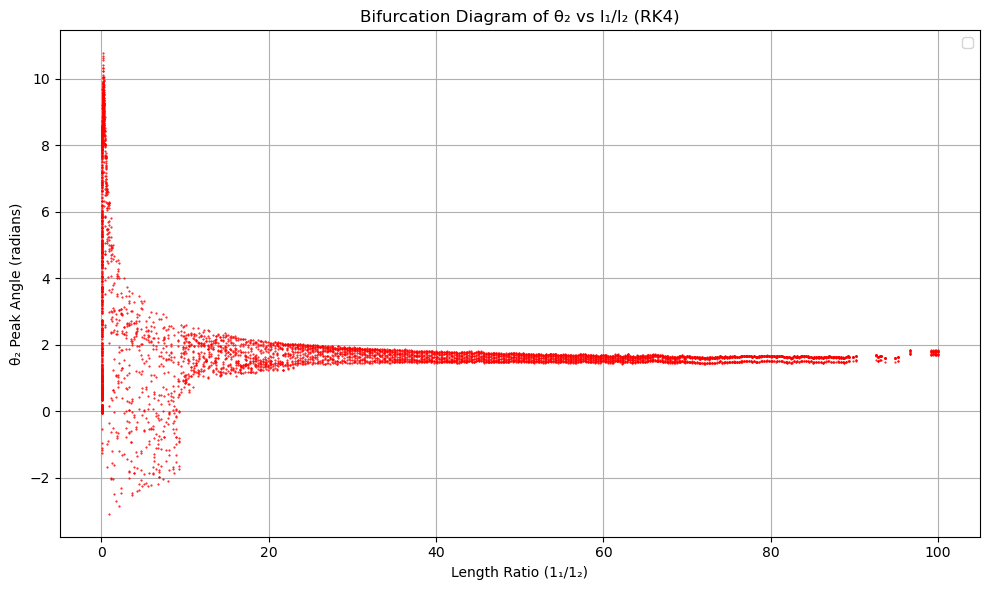

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
g = 9.81
m1 = 1.0
m2 = 1.0

# RK4 integrator
def rk4_step(f, t, y, dt, *args):
    k1 = dt * np.array(f(t, y, *args))
    k2 = dt * np.array(f(t + 0.5 * dt, y + 0.5 * k1, *args))
    k3 = dt * np.array(f(t + 0.5 * dt, y + 0.5 * k2, *args))
    k4 = dt * np.array(f(t + dt, y + k3, *args))
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Double pendulum dynamics
def double_pendulum(t, y, m1, m2, l1, l2):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + l1*m1*omega1**2*np.sin(theta1 - theta2) + l1*m2*omega1**2*np.sin(theta1 - theta2) + l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2)/(l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    
    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Initial conditions and time setup
y0 = [np.pi/2, 0, np.pi/2 + 0.01, 0]
t_max = 50
dt = 0.05
t_eval = np.arange(0, t_max, dt)

# Sweep through m2 (θ2 peaks) and m1 (θ1 peaks)
l1_fixed = 1.0
l2_fixed = 1.0
l2_values = np.linspace(0.1, 100.0, 500)
l1_values = np.linspace(0.1, 100.0, 500)

theta2_peaks = []
theta1_peaks = []

# θ2 peaks (sweep m2, fixed m1)
for l2 in l2_values:
    y = np.array(y0)
    θ2_vals = []
    for t in t_eval:
        θ2_vals.append(y[2])
        y = rk4_step(double_pendulum, t, y, dt, m1, m2, l1_fixed, l2)
    theta2 = np.array(θ2_vals[int(len(θ2_vals)/2):])
    second_diff = np.diff(np.sign(np.diff(theta2)))
    peak_indices = np.where(second_diff < 0)[0] + 1
    peaks = theta2[peak_indices]
    theta2_peaks.append(peaks[-10:] if len(peaks) >= 10 else [np.nan]*10)

# θ1 peaks (sweep m1, fixed m2)
for l1 in l1_values:
    y = np.array(y0)
    θ1_vals = []
    for t in t_eval:
        θ1_vals.append(y[2])
        y = rk4_step(double_pendulum, t, y, dt, m1, m2, l1, l2_fixed)
    theta1 = np.array(θ1_vals[int(len(θ1_vals)/2):])
    second_diff = np.diff(np.sign(np.diff(theta1)))
    peak_indices = np.where(second_diff < 0)[0] + 1
    peaks = theta1[peak_indices]
    theta1_peaks.append(peaks[-10:] if len(peaks) >= 10 else [np.nan]*10)

# Length ratios
length_ratio_θ2 = l1_fixed / l2_values
length_ratio_θ1 = l1_values / l2_fixed

# Plot overlay
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(length_ratio_θ2, [p[i] if len(p) > i else np.nan for p in theta2_peaks], 'r.', markersize=1)
    plt.plot(length_ratio_θ1, [p[i] if len(p) > i else np.nan for p in theta1_peaks], 'r.', markersize=1)

plt.xlabel('Length Ratio (1₁/1₂)')
plt.ylabel('θ₂ Peak Angle (radians)')
plt.title('Bifurcation Diagram of θ₂ vs l₁/l₂ (RK4)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

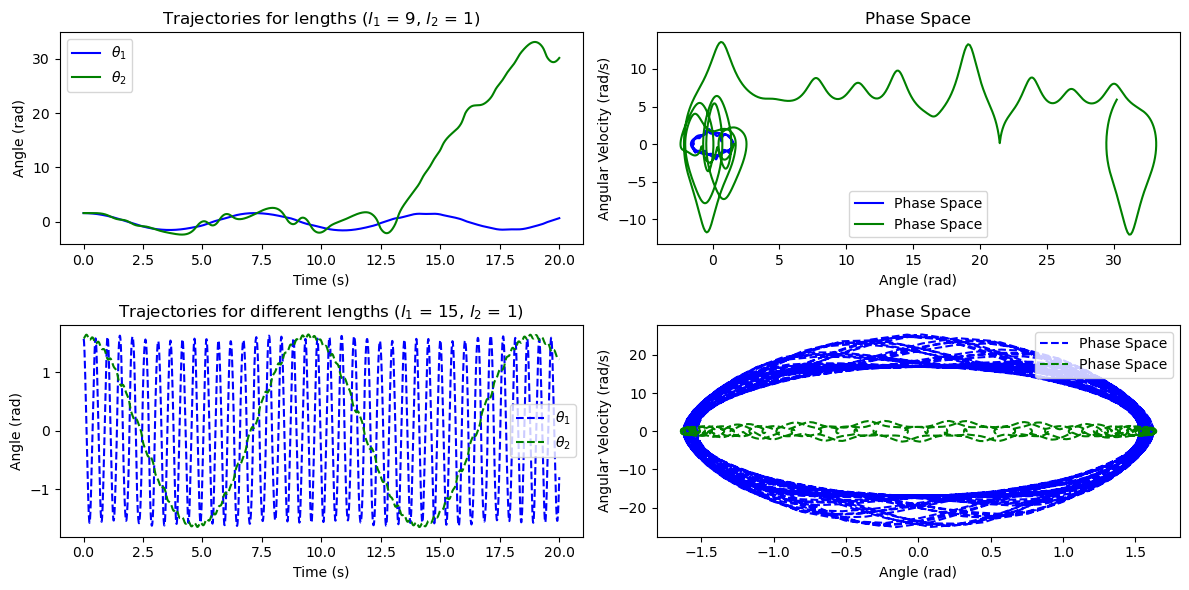

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration in m/s^2
l1 = 9.0  # length of pendulum 1 in meters
l2 = 1.0  # length of pendulum 2 in meters
m1 = 1.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 2 in kg

l1_2 = 1.0  # length of pendulum 1 in meters
l2_2 = 15.0  # length of pendulum 15 in meters
m1_2 = 1.0  # mass of pendulum 1 in kg
m2_2 = 1.0  # mass of pendulum 2 in kg

# Equations of motion for the double pendulum (derived from Lagrangian mechanics)
def double_pendulum(t, y, m1, m2, l1, l2):
    theta1, theta2, omega1, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = m2*(-g*l2*m1*np.sin(theta1) - g*l2*m2*np.sin(theta1) + g*np.sin(theta2)*np.cos(theta1 - theta2) - l1*omega1**2*np.sin(2*theta1 - 2*theta2)/2 - l2*omega2**2*np.sin(theta1 - theta2))/(l1*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    domega2_dt = (g*l2*m1*m2*np.sin(theta1)*np.cos(theta1 - theta2) + g*l2*m2**2*np.sin(theta1)*np.cos(theta1 - theta2) - g*m1*np.sin(theta2) - g*m2*np.sin(theta2) + l1*m1*omega1**2*np.sin(theta1 - theta2) + l1*m2*omega1**2*np.sin(theta1 - theta2) + l2*m2*omega2**2*np.sin(2*theta1 - 2*theta2)/2)/(l2*(m1 - m2*np.cos(theta1 - theta2)**2 + m2))
    
    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Implementing the RK4 method for numerical integration
def rk4_step(f, t, y, dt, *args):
    k1 = dt * np.array(f(t, y, *args))
    k2 = dt * np.array(f(t + 0.5 * dt, y + 0.5 * k1, *args))
    k3 = dt * np.array(f(t + 0.5 * dt, y + 0.5 * k2, *args))
    k4 = dt * np.array(f(t + dt, y + k3, *args))
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Initial conditions for two trajectories with small variations in initial angle
initial_conditions_1 = [np.pi / 2, np.pi / 2 + 0.01, 0, 0]  # Set 1: initial angles (90 degrees) and velocities (0)

# Time settings
t_max = 20  # maximum simulation time
dt = 0.01  # time step
num_steps = int(t_max / dt)

# Time array for plotting
t_eval = np.linspace(0, t_max, num_steps)

# Arrays to store the results
theta1_1, theta2_1, omega1_1, omega2_1 = [initial_conditions_1[0]], [initial_conditions_1[1]], [initial_conditions_1[2]], [initial_conditions_1[3]]
theta1_2, theta2_2, omega1_2, omega2_2 = [initial_conditions_1[0]], [initial_conditions_1[1]], [initial_conditions_1[2]], [initial_conditions_1[3]]

# Numerical integration using RK4 method
y1 = np.array(initial_conditions_1)
y2 = np.array(initial_conditions_1)

for t in t_eval[1:]:
    y1 = rk4_step(double_pendulum, t, y1, dt, m1, m2, l1, l2)
    y2 = rk4_step(double_pendulum, t, y2, dt, m1_2, m2_2, l1_2, l2_2)
    
    # Store the results
    theta1_1.append(y1[0])
    theta2_1.append(y1[1])
    omega1_1.append(y1[2])
    omega2_1.append(y1[3])
    
    theta1_2.append(y2[0])
    theta2_2.append(y2[1])
    omega1_2.append(y2[2])
    omega2_2.append(y2[3])

# Plot the results
plt.figure(figsize=(12, 6))

# Plot trajectories for both initial conditions
plt.subplot(2, 2, 1)
plt.plot(t_eval, theta1_1, label=r'$\theta_1$', color='b')
plt.plot(t_eval, theta2_1, label=r'$\theta_2$', color='g')
plt.title(r'Trajectories for lengths ($l_1$ = 9, $l_2$ = 1)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

# Plot phase space (theta1 vs omega1 and theta2 vs omega2)
plt.subplot(2, 2, 2)
plt.plot(theta1_1, omega1_1, label=r'Phase Space', color='b')
plt.plot(theta2_1, omega2_1, label=r'Phase Space', color='g')
plt.title('Phase Space')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

# Plot trajectories for both initial conditions
plt.subplot(2, 2, 3)
plt.plot(t_eval, theta1_2, label=r'$\theta_1$', linestyle='dashed', color='b')
plt.plot(t_eval, theta2_2, label=r'$\theta_2$', linestyle='dashed', color='g')
plt.title(r'Trajectories for different lengths ($l_1$ = 15, $l_2$ = 1)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()

# Plot phase space (theta1 vs omega1 and theta2 vs omega2)
plt.subplot(2, 2, 4)
plt.plot(theta1_2, omega1_2, label=r'Phase Space', linestyle='dashed', color='b')
plt.plot(theta2_2, omega2_2, label=r'Phase Space', linestyle='dashed', color='g')
plt.title('Phase Space')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()



To explore how the double pendulum transitions from stable to chaotic motion, we analyze the effects of varying system parameters—specifically **mass ratio (m₁/m₂)** and **length ratio (l₁/l₂)**—on the motion dynamics of the lower pendulum angle, θ₂.

---

### Is There a Threshold Where the Motion Transitions from Stable Oscillations to Chaotic Behavior?

Yes — as shown in the **first bifurcation diagram** (θ₂ peak vs. mass ratio), the system exhibits clear signs of chaotic motion at **low mass ratios (m₁/m₂ < 5)**. In this range, the θ₂ peak values are widely scattered, irregular, and show no repeating pattern — indicating **chaotic behavior**. As the mass ratio increases beyond **m₁/m₂ ≈ 5**, the peaks begin to **converge into a narrow band** (around 4–5 radians), signaling a **transition to stable, periodic oscillations**.

This identifies a clear **bifurcation threshold** at **m₁/m₂ ≈ 5**, beyond which the system becomes less sensitive to small perturbations and demonstrates more predictable motion.

In the **second bifurcation diagram** (θ₂ peak vs. length ratio l₁/l₂), we observe a similar behavior. When **l₁/l₂ < 10**, the system shows chaotic characteristics — scattered θ₂ peaks with a wide spread of amplitudes. As the length ratio increases past **l₁/l₂ ≈ 10**, the peaks begin to stabilize.

However, the **bifurcation threshold is harder to identify** in this case, as the system does not stabilize abruptly. Instead, it shows a **gradual transition to periodic motion**, with the convergence of peaks occurring more slowly over a wide range of l₁/l₂ values. This suggests that **increasing the upper arm length contributes to stability more progressively**, rather than sharply.

To support this threshold estimate, the **third graph** shows **time-domain and phase space plots** for two length ratio cases:

- **Case 1 (l₁ = 9, l₂ = 1; l₁/l₂ = 9):**  
  The motion begins regularly but becomes increasingly erratic. The θ₂ trajectory grows significantly in amplitude, and the corresponding phase plot shows broad, irregular loops — consistent with **unstable or chaotic motion**.

- **Case 2 (l₁ = 15, l₂ = 1; l₁/l₂ = 15):**  
  The motion becomes **highly periodic**. The θ₁ and θ₂ time histories are smooth and rhythmic, and the phase space diagram shows clean, closed orbits — clear indicators of **stable behavior**.

These results reinforce the interpretation that the **bifurcation threshold for length ratio somewhere between 9 ~ 15, but that the **transition to stability is more gradual** compared to the sharper transition seen in the mass ratio plot.

---

### How Do Different Mass Ratios and Lengths Affect Stability?

The **first bifurcation diagram** (θ₂ peak vs. mass ratio m₁/m₂) shows a clear relationship between **mass ratio** and **system stability**. When the mass ratio is low (m₁/m₂ < 5), the peaks of θ₂ are highly scattered and span a wide range, indicating **chaotic behavior** and sensitivity to small changes. However, as the mass ratio increases beyond m₁/m₂ ≈ 5, the θ₂ peaks begin to **converge into a narrow band**, suggesting the motion becomes **increasingly periodic and stable**. This supports the idea that **a heavier upper pendulum (m₁)** helps suppress the chaotic swings of the lower pendulum.

---

The **second bifurcation diagram** (θ₂ peak vs. length ratio l₁/l₂) provides further insight into the role of **pendulum geometry** in stability:

- When l₁ is much smaller than l₂ (i.e., **shorter upper arm**), the system experiences large, erratic swings with θ₂ peaks scattered across a broad range. This reflects a **lack of control or balance** in the system, leading to chaotic motion.
- As the length ratio increases (**longer l₁ relative to l₂**), the peaks **gradually converge**, indicating a smoother, more controlled oscillation. However, this convergence happens **more gradually** than in the mass ratio case, suggesting that **length-based stabilization occurs progressively**, not abruptly.

Additional insight:  
- The convergence of θ₂ peaks at large length ratios (~l₁/l₂ > 30) suggests that increasing the upper pendulum's length **reduces the sensitivity of the system to external energy input**, functioning almost like a damping lever even in the absence of friction.

### Summary

- **Higher mass ratios (m₁ ≫ m₂)** help stabilize the system by providing a stronger inertial anchor for the chaotic lower pendulum.
- **Longer upper arms (l₁ ≫ l₂)** promote stability but do so **more gradually**, softening the transition from chaos to order.

These observations highlight how **both mass and geometric asymmetries** play a critical role in shaping the dynamic behavior of nonlinear pendulum systems.


### Conclusion

This project explored the nonlinear dynamics of the double pendulum system using both undamped and damped models, with a focus on the effects of numerical integration method and time step size. We began by identifying key questions about the system's behavior, including how well energy is conserved under different numerical schemes, how damping influences long-term motion, and how chaotic sensitivity manifests under small variations in initial conditions. Our simulations showed that the **Runge-Kutta 4th order (RK4)** method provides high accuracy and excellent short-term trajectory prediction, but at the cost of energy drift in undamped simulations over long time intervals. In contrast, the **Symplectic Euler method**, while less accurate per step, better conserved total energy in the undamped case and captured long-term trends more reliably. These findings align with theoretical expectations regarding stability and energy behavior for conservative vs. dissipative systems. 
We also investigated the impact of **time step size**, revealing that larger steps introduce numerical instability in RK4 and degrade physical realism. Symplectic Euler, though more robust under coarse step sizes, still required moderate resolution to capture fine structure in the dynamics. The introduction of **damping** led to predictable energy decay and more regular motion, which both methods captured, though again, Symplectic Euler preserved the energy trend more consistently. From a modeling perspective, the double pendulum’s sensitivity to initial conditions was evident in diverging trajectories for even slightly different configurations. This confirmed the chaotic nature of the system and emphasized the importance of method selection when simulating nonlinear dynamics.
RK4 is ideal for short-term, high-accuracy predictions when energy conservation is less critical and Symplectic Euler is preferred for long-term qualitative studies and systems where total energy must remain physically consistent. Proper time step tuning is essential to avoid artifacts or instability and damping significantly regularizes the system, making results more predictable and interpretable. These insights not only demonstrate the effectiveness of our chosen methods but also reinforce the double pendulum’s relevance as a benchmark system in dynamics, control, and simulation.


## Team Contributions

Below is a summary of each team member’s contributions to the project, along with an estimated percentage of effort. All members contributed meaningfully to at least one of the rubric items (1)–(4), which include:  
1. Clearly defining the physical system and modeling assumptions  
2. Choosing and justifying the numerical method(s)  
3. Implementing the method(s) correctly  
4. Analyzing and interpreting the results


### Jonah Wu – 45%
Jonah served as the **primary lead on numerical methods implementation**. He was responsible for coding and debugging the Runge-Kutta 4th order (RK4) and Symplectic Euler solvers used to simulate the double pendulum. He validated each method using energy conservation checks and comparison against known solutions. Jonah also developed plots demonstrating phase space behavior and energy evolution under different time steps. His work directly contributed to:
- **Rubric Item 2**: Choosing and justifying RK4 vs. Symplectic Euler methods  
- **Rubric Item 3**: Correctly implementing these methods in code


### Eric Chiang – 30%
Eric focused on the **physical modeling and system formulation**. He led the derivation of the equations of motion for both the undamped and damped double pendulum systems and ensured correct physical interpretation of the results. Eric also contributed to the Lyapunov exponent analysis to demonstrate chaotic sensitivity. Eric also work on creating a Githib repository. His work primarily addressed:
- **Rubric Item 1**: Defining the physical system and modeling assumptions  
- **Rubric Item 4**: Contributing to the analysis and interpretation of chaotic behavior


### Josué R. Bashombe – 25%
Josué worked on **incorporating damping into the double pendulum model** and **investigating the effect of time step size on numerical accuracy and energy conservation**. He analyzed how different step sizes impact the performance of RK4 and Symplectic Euler methods. Josué also coordinated team communication, compiled the final notebook, and authored the Abstract, Introduction, and Conclusion sections. His contributions align with:
- **Rubric Item 3**: Implementing damping and time step analysis in simulation code  
- **Rubric Item 4**: Analyzing numerical stability and physical behavior under varying step sizes


## Acknowledgements

This project benefited from the use of [ChatGPT](https://openai.com/chatgpt) by OpenAI for technical guidance, debugging assistance, and explanation of complex dynamic behaviors in nonlinear systems such as the double pendulum. The insights and code improvements suggested by ChatGPT were instrumental in enhancing the accuracy and stability of the simulation.